<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:25%"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 250px; height: 125px; "></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Assignment 2 - Sentiment Analysis Model (Problem 1)</h2><h3>AY2020/21 Semester</h3></th>
    </tr>
</table>

### Done by Ng Chin Tiong Ryan (DL02/CSF03)

In [1]:
# Import the Required Packages
from tensorflow import keras
print('keras: ', keras.__version__)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

keras:  2.2.4-tf


## Step 1 – Data Loading and Processing

### 1.1 Data Loading

In [2]:
# Load the emoji_dictionary
import pandas as pd
df = pd.read_csv('Mapping.csv', delimiter=',')
emoji_dictionary = df.loc[:,'emoticons'].to_dict()
print(emoji_dictionary)
print('A total of: ', len(emoji_dictionary), 'Emoji Icons')

{0: '😍', 1: '😂', 2: '📷', 3: '🔥', 4: '❤'}
A total of:  5 Emoji Icons


In [3]:
# load the dataset
dat = pd.read_csv('dataset.csv', delimiter=',')
texts = dat.loc[:,'TEXT'].values 
labels = dat.loc[:,'Label'].values
print(texts)
print(labels)

['Been friends since 7th grade. Look at us now we all following our dreams doing what we love and…\n'
 'This is what it looks like when someone loves you unconditionally oh Puppy Brother. #htx…\n'
 "RT @user this white family was invited to a Black barbecue and i've never laughed so hard in my life\n"
 ...
 'Meet Olive. Our new #GreatDane ️ ️ ️#DogsOfDenver #Dane #DogLove @ Dream Denver\n'
 '"I talk gray, I don\'t keep it white and black" : @user @ Three Rivers Park District -…\n'
 'When his baby comes to visit. ️#cheflife #chefdogs #chanceboudreaux #bloodhoundpuppy…\n']
[0 1 1 ... 4 2 4]


In [4]:
# Check the maximum length of texts
max_len = -1
for example in texts:
    if len(example.split()) > max_len:
        max_len = len(example.split())
        
print('the maximum length of the text inputs is ', max_len)

the maximum length of the text inputs is  34


### 1.2 Data Processing


In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

max_words = 10000  

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
data = pad_sequences(sequences, maxlen=max_len)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

X = data
y = labels

Found 54076 unique tokens.
Shape of data tensor: (42546, 34)
Shape of label tensor: (42546,)


### 1.3 Data Sampling

In [6]:
# Split the X & y into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 40)
# Refer the report Appendix
# Please enter the random_state assigned to you
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[   0    0    0 ...   24 5993  682]
 [   0    0    0 ... 1971  500  756]
 [   0    0    0 ... 1147   61  668]
 ...
 [   0    0    0 ...    3 1105  922]
 [   0    0    0 ...   22 2121 2816]
 [   0    0    0 ...   13    2  813]]
[[   0    0    0 ...   33 1130 3073]
 [   0    0    0 ...   61  211 1271]
 [   0    0    0 ...  259  142  580]
 ...
 [   0    0    0 ... 1033 1274  534]
 [   0    0    0 ... 5355  738 7122]
 [   0    0    0 ...  869    1 7623]]
[0 4 4 ... 4 0 3]
[1 3 0 ... 0 4 3]


## Step 2 – Develop a Sentiment Analysis Model & Step 3 Evaluate on Test Accuracies

### Model #1 NonPT LSTM RMSProp Base

In [7]:
# Build the Model
embedding_dim = 50

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, LSTM
from tensorflow.keras import regularizers
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(32))
model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 34, 50)            500000    
_________________________________________________________________
lstm (LSTM)                  (None, 34, 32)            10624     
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense (Dense)                (None, 5)                 165       
Total params: 519,109
Trainable params: 519,109
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Train the Model
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=128,
                    validation_split=0.2)

Train on 27228 samples, validate on 6808 samples
Epoch 1/50
27228/27228 [==============================] - 16s 580us/sample - loss: 1.2501 - acc: 0.4818 - val_loss: 1.0864 - val_acc: 0.5473
Epoch 2/50
27228/27228 [==============================] - 8s 310us/sample - loss: 0.9963 - acc: 0.5923 - val_loss: 1.0201 - val_acc: 0.5787
Epoch 3/50
27228/27228 [==============================] - 6s 226us/sample - loss: 0.8917 - acc: 0.6434 - val_loss: 0.9980 - val_acc: 0.5884
Epoch 4/50
27228/27228 [==============================] - 6s 217us/sample - loss: 0.8163 - acc: 0.6805 - val_loss: 0.9865 - val_acc: 0.6108
Epoch 5/50
27228/27228 [==============================] - 6s 219us/sample - loss: 0.7532 - acc: 0.7125 - val_loss: 0.9966 - val_acc: 0.6102
Epoch 6/50
27228/27228 [==============================] - 7s 242us/sample - loss: 0.6975 - acc: 0.7379 - val_loss: 1.0012 - val_acc: 0.6172
Epoch 7/50
27228/27228 [==============================] - 3s 128us/sample - loss: 0.6504 - acc: 0.7590 - val_l

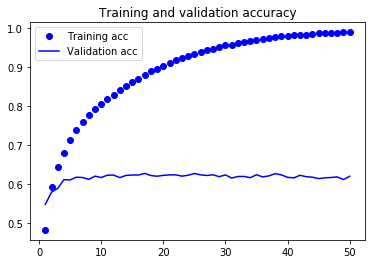

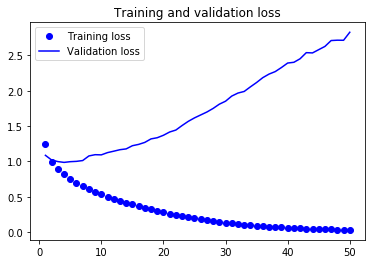

In [9]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [11]:
results = model.evaluate(X_test, y_test, verbose=2)
results # returns the loss value and accuracy

8510/8510 - 2s - loss: 2.7668 - acc: 0.6275


[2.7667604046338594, 0.6274971]

In [12]:
# Save the Model
model.save('text_model_1.h5')

### Model #2 NonPT LSTM RMSprop Add 1 layer

In [80]:
# Build the Model
embedding_dim = 50

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, LSTM
from tensorflow.keras import regularizers
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(32))
model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_18 (Embedding)     (None, 34, 50)            500000    
_________________________________________________________________
lstm_41 (LSTM)               (None, 34, 32)            10624     
_________________________________________________________________
lstm_42 (LSTM)               (None, 34, 64)            24832     
_________________________________________________________________
lstm_43 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dense_17 (Dense)             (None, 5)                 165       
Total params: 548,037
Trainable params: 548,037
Non-trainable params: 0
_________________________________________________________________


In [81]:
# Train the Model
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2)

Train on 27228 samples, validate on 6808 samples
Epoch 1/20
27228/27228 [==============================] - 10s 366us/sample - loss: 1.2572 - acc: 0.4757 - val_loss: 1.1339 - val_acc: 0.5079
Epoch 2/20
27228/27228 [==============================] - 5s 199us/sample - loss: 1.0338 - acc: 0.5594 - val_loss: 1.0655 - val_acc: 0.5452
Epoch 3/20
27228/27228 [==============================] - 5s 182us/sample - loss: 0.9300 - acc: 0.6136 - val_loss: 1.0051 - val_acc: 0.5759
Epoch 4/20
27228/27228 [==============================] - 5s 174us/sample - loss: 0.8467 - acc: 0.6609 - val_loss: 0.9996 - val_acc: 0.6041
Epoch 5/20
27228/27228 [==============================] - 6s 215us/sample - loss: 0.7741 - acc: 0.7018 - val_loss: 0.9885 - val_acc: 0.5999
Epoch 6/20
27228/27228 [==============================] - 7s 256us/sample - loss: 0.7174 - acc: 0.7292 - val_loss: 0.9988 - val_acc: 0.6146
Epoch 7/20
27228/27228 [==============================] - 4s 163us/sample - loss: 0.6670 - acc: 0.7533 - val_l

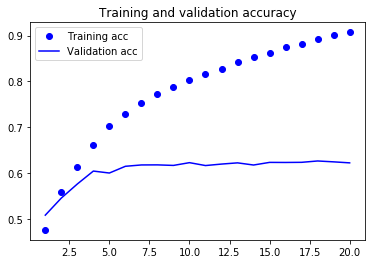

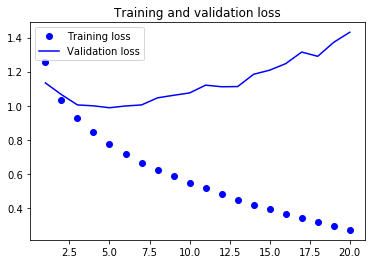

In [82]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [83]:
results = model.evaluate(X_test, y_test, verbose=2)
results # returns the loss value and accuracy

8510/8510 - 2s - loss: 1.4174 - acc: 0.6259


[1.4173936721160745, 0.6258519]

In [ ]:
# Save the Model
model.save('text_model_2.h5')

### Model #3 NonPT LSTM RMSprop Add L2 reg; change batch size

In [28]:
# Build the Model
embedding_dim = 50

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, LSTM
from tensorflow.keras import regularizers
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(LSTM(32, return_sequences=True, recurrent_regularizer=regularizers.l2(0.001)))
model.add(LSTM(64))
model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 34, 50)            500000    
_________________________________________________________________
lstm_18 (LSTM)               (None, 34, 32)            10624     
_________________________________________________________________
lstm_19 (LSTM)               (None, 64)                24832     
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 325       
Total params: 535,781
Trainable params: 535,781
Non-trainable params: 0
_________________________________________________________________


In [29]:
# Train the Model
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2)

Train on 27228 samples, validate on 6808 samples
Epoch 1/20
27228/27228 [==============================] - 15s 557us/sample - loss: 1.1351 - acc: 0.5198 - val_loss: 1.0342 - val_acc: 0.5648
Epoch 2/20
27228/27228 [==============================] - 11s 391us/sample - loss: 0.9547 - acc: 0.6053 - val_loss: 0.9823 - val_acc: 0.6034
Epoch 3/20
27228/27228 [==============================] - 11s 390us/sample - loss: 0.8674 - acc: 0.6580 - val_loss: 0.9617 - val_acc: 0.6150
Epoch 4/20
27228/27228 [==============================] - 13s 493us/sample - loss: 0.7937 - acc: 0.6933 - val_loss: 0.9602 - val_acc: 0.6234
Epoch 5/20
27228/27228 [==============================] - 15s 560us/sample - loss: 0.7367 - acc: 0.7183 - val_loss: 0.9647 - val_acc: 0.6234
Epoch 6/20
27228/27228 [==============================] - 11s 390us/sample - loss: 0.6856 - acc: 0.7437 - val_loss: 0.9822 - val_acc: 0.6231
Epoch 7/20
27228/27228 [==============================] - 10s 385us/sample - loss: 0.6434 - acc: 0.7617 -

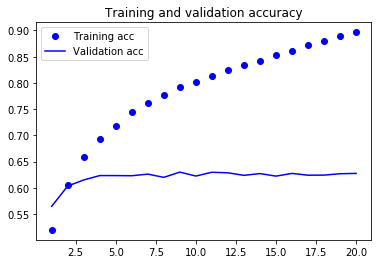

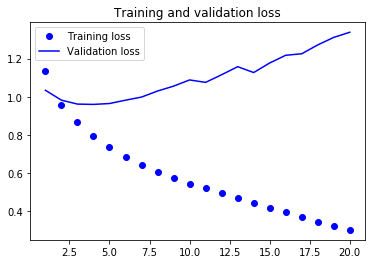

In [30]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [31]:
results = model.evaluate(X_test, y_test, verbose=2)
results # returns the loss value and accuracy

8510/8510 - 3s - loss: 1.3138 - acc: 0.6254


[1.3138317877761625, 0.6253819]

### Model #4 NonPT LSTM Adam Base

In [32]:
# Build the Model
embedding_dim = 50

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, LSTM
from tensorflow.keras import regularizers
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(32))
model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 34, 50)            500000    
_________________________________________________________________
lstm_20 (LSTM)               (None, 34, 32)            10624     
_________________________________________________________________
lstm_21 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 165       
Total params: 519,109
Trainable params: 519,109
Non-trainable params: 0
_________________________________________________________________


In [33]:
# Train the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2)

Train on 27228 samples, validate on 6808 samples
Epoch 1/20
27228/27228 [==============================] - 16s 581us/sample - loss: 1.1266 - acc: 0.5275 - val_loss: 0.9994 - val_acc: 0.5933
Epoch 2/20
27228/27228 [==============================] - 10s 351us/sample - loss: 0.8405 - acc: 0.6641 - val_loss: 0.9556 - val_acc: 0.6247
Epoch 3/20
27228/27228 [==============================] - 10s 386us/sample - loss: 0.6684 - acc: 0.7493 - val_loss: 1.0027 - val_acc: 0.6278
Epoch 4/20
27228/27228 [==============================] - 10s 377us/sample - loss: 0.5447 - acc: 0.7992 - val_loss: 1.0545 - val_acc: 0.6350
Epoch 5/20
27228/27228 [==============================] - 11s 408us/sample - loss: 0.4476 - acc: 0.8403 - val_loss: 1.1844 - val_acc: 0.6309
Epoch 6/20
27228/27228 [==============================] - 10s 375us/sample - loss: 0.3689 - acc: 0.8670 - val_loss: 1.2746 - val_acc: 0.6323
Epoch 7/20
27228/27228 [==============================] - 11s 419us/sample - loss: 0.3000 - acc: 0.8936 -

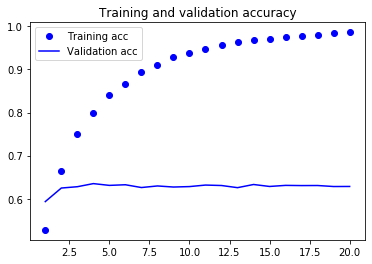

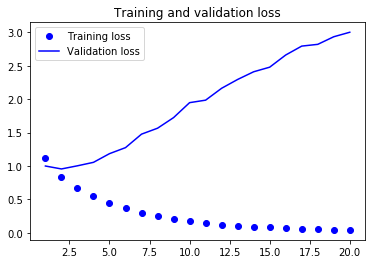

In [34]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [35]:
results = model.evaluate(X_test, y_test, verbose=2)
results # returns the loss value and accuracy

8510/8510 - 2s - loss: 2.9142 - acc: 0.6336


[2.9142338340907203, 0.6336075]

### Model #5 NonPT LSTM Adam Add L2 reg

In [36]:
# Build the Model
embedding_dim = 100

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, LSTM
from tensorflow.keras import regularizers
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(LSTM(32, return_sequences=True, recurrent_regularizer=regularizers.l2(0.01)))
model.add(LSTM(32))
model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 34, 100)           1000000   
_________________________________________________________________
lstm_22 (LSTM)               (None, 34, 32)            17024     
_________________________________________________________________
lstm_23 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dense_9 (Dense)              (None, 5)                 165       
Total params: 1,025,509
Trainable params: 1,025,509
Non-trainable params: 0
_________________________________________________________________


In [37]:
# Train the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2)

Train on 27228 samples, validate on 6808 samples
Epoch 1/20
27228/27228 [==============================] - 19s 693us/sample - loss: 1.1234 - acc: 0.5440 - val_loss: 0.9709 - val_acc: 0.6062
Epoch 2/20
27228/27228 [==============================] - 13s 490us/sample - loss: 0.8030 - acc: 0.6878 - val_loss: 0.9703 - val_acc: 0.6175
Epoch 3/20
27228/27228 [==============================] - 14s 517us/sample - loss: 0.6287 - acc: 0.7645 - val_loss: 0.9948 - val_acc: 0.6300
Epoch 4/20
27228/27228 [==============================] - 14s 517us/sample - loss: 0.5076 - acc: 0.8138 - val_loss: 1.1003 - val_acc: 0.6312
Epoch 5/20
27228/27228 [==============================] - 15s 534us/sample - loss: 0.4193 - acc: 0.8484 - val_loss: 1.2257 - val_acc: 0.6337
Epoch 6/20
27228/27228 [==============================] - 15s 543us/sample - loss: 0.3517 - acc: 0.8712 - val_loss: 1.3589 - val_acc: 0.6328
Epoch 7/20
27228/27228 [==============================] - 15s 551us/sample - loss: 0.3001 - acc: 0.8913 -

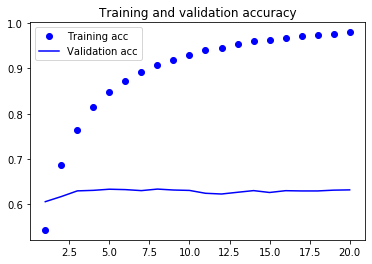

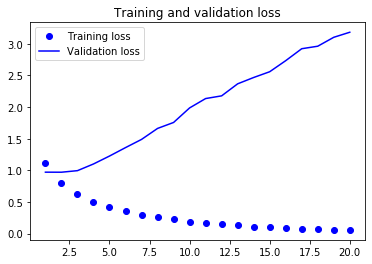

In [38]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [39]:
results = model.evaluate(X_test, y_test, verbose=2)
results # returns the loss value and accuracy

8510/8510 - 1s - loss: 3.1623 - acc: 0.6294


[3.162336896085011, 0.6293772]

### Model #6 NonPT LSTM Adam 1 layer; increase batch size

In [70]:
# Build the Model
embedding_dim = 50

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, LSTM
from tensorflow.keras import regularizers
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(LSTM(16, recurrent_regularizer=regularizers.l2(0.01)))
model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 34, 50)            500000    
_________________________________________________________________
lstm_6 (LSTM)                (None, 16)                4288      
_________________________________________________________________
dense_11 (Dense)             (None, 5)                 85        
Total params: 504,373
Trainable params: 504,373
Non-trainable params: 0
_________________________________________________________________


In [71]:
# Train the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=1024, 
                    validation_split=0.2)

Train on 27228 samples, validate on 6808 samples
Epoch 1/20
27228/27228 [==============================] - 6s 233us/sample - loss: 1.6906 - acc: 0.3936 - val_loss: 1.5983 - val_acc: 0.4280
Epoch 2/20
27228/27228 [==============================] - 1s 41us/sample - loss: 1.5282 - acc: 0.4256 - val_loss: 1.4633 - val_acc: 0.4295
Epoch 3/20
27228/27228 [==============================] - 1s 45us/sample - loss: 1.3851 - acc: 0.4548 - val_loss: 1.3310 - val_acc: 0.4764
Epoch 4/20
27228/27228 [==============================] - 1s 44us/sample - loss: 1.2349 - acc: 0.5190 - val_loss: 1.2377 - val_acc: 0.5118
Epoch 5/20
27228/27228 [==============================] - 1s 43us/sample - loss: 1.1205 - acc: 0.5591 - val_loss: 1.1662 - val_acc: 0.5391
Epoch 6/20
27228/27228 [==============================] - 1s 40us/sample - loss: 1.0229 - acc: 0.6116 - val_loss: 1.1199 - val_acc: 0.5698
Epoch 7/20
27228/27228 [==============================] - 1s 44us/sample - loss: 0.9356 - acc: 0.6770 - val_loss: 1.

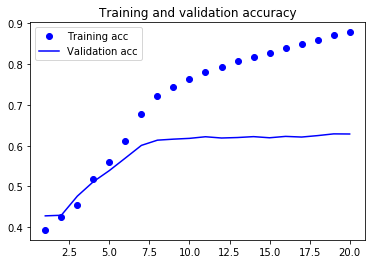

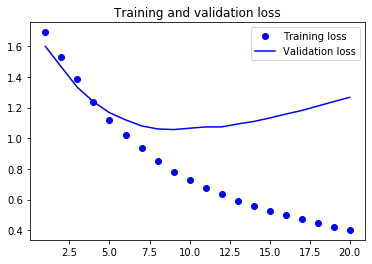

In [72]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [73]:
results = model.evaluate(X_test, y_test, verbose=2)
results # returns the loss value and accuracy

8510/8510 - 2s - loss: 1.2497 - acc: 0.6341


[1.2497192720688888, 0.63407755]

In [74]:
model.save('text_model_6.h5')

### Model #7 NonPT GRU RMSprop Base 

In [75]:
from tensorflow.keras.layers import GRU, Embedding, Dense
from tensorflow.keras.models import Sequential

embedding_dim = 50
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(GRU(32, return_sequences=True))
model.add(GRU(32))
model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 34, 50)            500000    
_________________________________________________________________
gru_23 (GRU)                 (None, 34, 32)            8064      
_________________________________________________________________
gru_24 (GRU)                 (None, 32)                6336      
_________________________________________________________________
dense_12 (Dense)             (None, 5)                 165       
Total params: 514,565
Trainable params: 514,565
Non-trainable params: 0
_________________________________________________________________


In [76]:
# Train the Model
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2)

Train on 27228 samples, validate on 6808 samples
Epoch 1/20
27228/27228 [==============================] - 16s 571us/sample - loss: 1.1999 - acc: 0.4929 - val_loss: 1.0697 - val_acc: 0.5383
Epoch 2/20
27228/27228 [==============================] - 8s 285us/sample - loss: 0.9786 - acc: 0.5852 - val_loss: 1.0016 - val_acc: 0.5748
Epoch 3/20
27228/27228 [==============================] - 8s 288us/sample - loss: 0.8822 - acc: 0.6371 - val_loss: 0.9961 - val_acc: 0.5867
Epoch 4/20
27228/27228 [==============================] - 8s 289us/sample - loss: 0.8169 - acc: 0.6771 - val_loss: 1.0169 - val_acc: 0.5967
Epoch 5/20
27228/27228 [==============================] - 8s 284us/sample - loss: 0.7625 - acc: 0.7059 - val_loss: 1.0044 - val_acc: 0.6100
Epoch 6/20
27228/27228 [==============================] - 8s 298us/sample - loss: 0.7084 - acc: 0.7296 - val_loss: 1.0066 - val_acc: 0.6119
Epoch 7/20
27228/27228 [==============================] - 8s 302us/sample - loss: 0.6618 - acc: 0.7535 - val_l

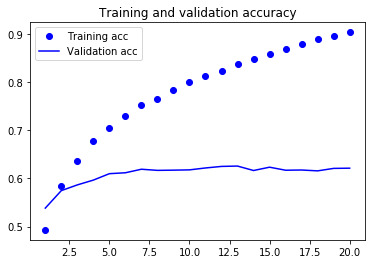

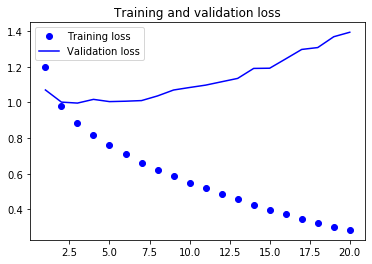

In [77]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [78]:
results = model.evaluate(X_test, y_test, verbose=2)
results # returns the loss value and accuracy

8510/8510 - 3s - loss: 1.3792 - acc: 0.6244


[1.3791578104857412, 0.62444186]

### Model #8 NonPT GRU RMSprop add dropout

In [93]:
from tensorflow.keras.layers import GRU, Embedding, Dense
from tensorflow.keras.models import Sequential

embedding_dim = 50
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(GRU(32, return_sequences=True, dropout = 0.1, recurrent_dropout = 0.1))
model.add(GRU(32, return_sequences=True, dropout = 0.1, recurrent_dropout = 0.1))
model.add(GRU(32))
model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_28 (Embedding)     (None, 34, 50)            500000    
_________________________________________________________________
gru_6 (GRU)                  (None, 34, 32)            8064      
_________________________________________________________________
gru_7 (GRU)                  (None, 34, 32)            6336      
_________________________________________________________________
gru_8 (GRU)                  (None, 32)                6336      
_________________________________________________________________
dense_23 (Dense)             (None, 5)                 165       
Total params: 520,901
Trainable params: 520,901
Non-trainable params: 0
_________________________________________________________________


In [94]:
# Train the Model
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2)

Train on 27228 samples, validate on 6808 samples
Epoch 1/20
27228/27228 [==============================] - 31s 1ms/sample - loss: 1.2036 - acc: 0.4903 - val_loss: 1.0724 - val_acc: 0.5427
Epoch 2/20
27228/27228 [==============================] - 25s 924us/sample - loss: 0.9900 - acc: 0.5794 - val_loss: 1.0247 - val_acc: 0.5640
Epoch 3/20
27228/27228 [==============================] - 25s 929us/sample - loss: 0.8942 - acc: 0.6320 - val_loss: 0.9824 - val_acc: 0.5961
Epoch 4/20
27228/27228 [==============================] - 25s 921us/sample - loss: 0.8177 - acc: 0.6767 - val_loss: 0.9829 - val_acc: 0.6068
Epoch 5/20
27228/27228 [==============================] - 26s 971us/sample - loss: 0.7562 - acc: 0.7081 - val_loss: 0.9847 - val_acc: 0.6106
Epoch 6/20
27228/27228 [==============================] - 26s 939us/sample - loss: 0.7077 - acc: 0.7314 - val_loss: 1.0111 - val_acc: 0.6091
Epoch 7/20
27228/27228 [==============================] - 25s 926us/sample - loss: 0.6687 - acc: 0.7531 - v

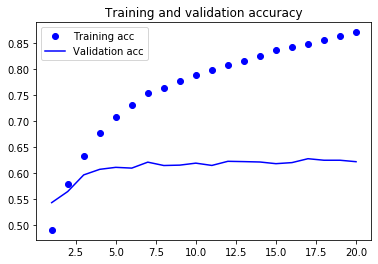

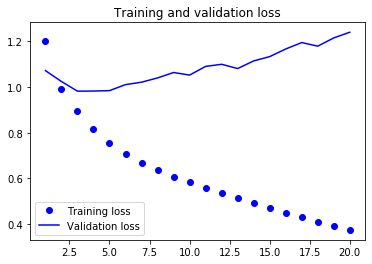

In [95]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [96]:
results = model.evaluate(X_test, y_test, verbose=2)
results # returns the loss value and accuracy

8510/8510 - 6s - loss: 1.2268 - acc: 0.6256


[1.226808656592767, 0.6256169]

### Model #9 NonPT GRU RMSprop increase dropout

In [97]:
from tensorflow.keras.layers import GRU, Embedding, Dense
from tensorflow.keras.models import Sequential

embedding_dim = 50
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(GRU(32, return_sequences=True, dropout = 0.2, recurrent_dropout = 0.2))
model.add(GRU(32))
model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_29 (Embedding)     (None, 34, 50)            500000    
_________________________________________________________________
gru_9 (GRU)                  (None, 34, 32)            8064      
_________________________________________________________________
gru_10 (GRU)                 (None, 32)                6336      
_________________________________________________________________
dense_24 (Dense)             (None, 5)                 165       
Total params: 514,565
Trainable params: 514,565
Non-trainable params: 0
_________________________________________________________________


In [98]:
# Train the Model
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=256,
                    validation_split=0.2)

Train on 27228 samples, validate on 6808 samples
Epoch 1/20
27228/27228 [==============================] - 11s 401us/sample - loss: 1.2744 - acc: 0.4684 - val_loss: 1.1190 - val_acc: 0.5191
Epoch 2/20
27228/27228 [==============================] - 7s 255us/sample - loss: 1.0512 - acc: 0.5579 - val_loss: 1.0502 - val_acc: 0.5476
Epoch 3/20
27228/27228 [==============================] - 7s 262us/sample - loss: 0.9465 - acc: 0.6029 - val_loss: 1.0127 - val_acc: 0.5746
Epoch 4/20
27228/27228 [==============================] - 7s 264us/sample - loss: 0.8752 - acc: 0.6407 - val_loss: 1.0396 - val_acc: 0.5698
Epoch 5/20
27228/27228 [==============================] - 7s 256us/sample - loss: 0.8193 - acc: 0.6710 - val_loss: 1.0224 - val_acc: 0.5884
Epoch 6/20
27228/27228 [==============================] - 7s 269us/sample - loss: 0.7602 - acc: 0.7070 - val_loss: 1.0176 - val_acc: 0.6049
Epoch 7/20
27228/27228 [==============================] - 7s 275us/sample - loss: 0.7154 - acc: 0.7273 - val_l

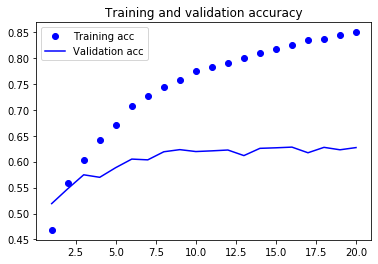

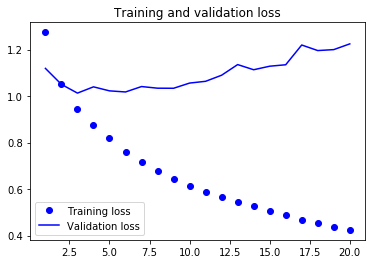

In [99]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [100]:
results = model.evaluate(X_test, y_test, verbose=2)
results # returns the loss value and accuracy

8510/8510 - 4s - loss: 1.2148 - acc: 0.6177


[1.2147616273507948, 0.61774385]

### Model #10 NonPT GRU RMSprop increase nodes

In [101]:
from tensorflow.keras.layers import GRU, Embedding, Dense
from tensorflow.keras.models import Sequential

embedding_dim = 50
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(GRU(64, dropout = 0.1, recurrent_dropout = 0.1))
model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_30 (Embedding)     (None, 34, 50)            500000    
_________________________________________________________________
gru_11 (GRU)                 (None, 64)                22272     
_________________________________________________________________
dense_25 (Dense)             (None, 5)                 325       
Total params: 522,597
Trainable params: 522,597
Non-trainable params: 0
_________________________________________________________________


In [102]:
# Train the Model
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2)

Train on 27228 samples, validate on 6808 samples
Epoch 1/20
27228/27228 [==============================] - 16s 587us/sample - loss: 1.2261 - acc: 0.4783 - val_loss: 1.0870 - val_acc: 0.5316
Epoch 2/20
27228/27228 [==============================] - 14s 503us/sample - loss: 1.0086 - acc: 0.5772 - val_loss: 1.0046 - val_acc: 0.5737
Epoch 3/20
27228/27228 [==============================] - 14s 505us/sample - loss: 0.8957 - acc: 0.6384 - val_loss: 0.9802 - val_acc: 0.5962
Epoch 4/20
27228/27228 [==============================] - 14s 503us/sample - loss: 0.8151 - acc: 0.6821 - val_loss: 0.9897 - val_acc: 0.6038
Epoch 5/20
27228/27228 [==============================] - 14s 509us/sample - loss: 0.7555 - acc: 0.7095 - val_loss: 0.9842 - val_acc: 0.6083
Epoch 6/20
27228/27228 [==============================] - 14s 518us/sample - loss: 0.7041 - acc: 0.7325 - val_loss: 1.0036 - val_acc: 0.6116
Epoch 7/20
27228/27228 [==============================] - 14s 511us/sample - loss: 0.6606 - acc: 0.7518 -

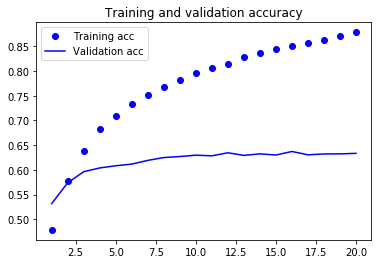

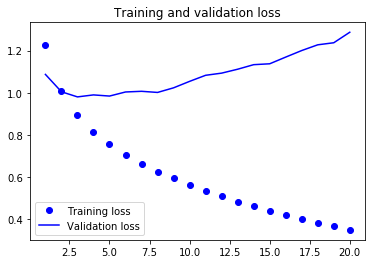

In [103]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [104]:
results = model.evaluate(X_test, y_test, verbose=2)
results # returns the loss value and accuracy

8510/8510 - 4s - loss: 1.2677 - acc: 0.6288


[1.2676673594989172, 0.62878966]

### Model #11 NonPT GRU Adam Base

In [94]:
from tensorflow.keras.layers import GRU, Embedding, Dense
from tensorflow.keras.models import Sequential

embedding_dim = 50
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(GRU(32, return_sequences=True))
model.add(GRU(32))
model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 34, 50)            500000    
_________________________________________________________________
gru (GRU)                    (None, 34, 32)            8064      
_________________________________________________________________
gru_1 (GRU)                  (None, 32)                6336      
_________________________________________________________________
dense (Dense)                (None, 5)                 165       
Total params: 514,565
Trainable params: 514,565
Non-trainable params: 0
_________________________________________________________________


In [95]:
# Train the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2)

Train on 27228 samples, validate on 6808 samples
Epoch 1/20
27228/27228 [==============================] - 26s 939us/sample - loss: 1.2266 - acc: 0.4837 - val_loss: 1.0597 - val_acc: 0.5508
Epoch 2/20
27228/27228 [==============================] - 12s 443us/sample - loss: 0.9317 - acc: 0.6151 - val_loss: 0.9801 - val_acc: 0.6022
Epoch 3/20
27228/27228 [==============================] - 12s 436us/sample - loss: 0.7584 - acc: 0.7048 - val_loss: 0.9785 - val_acc: 0.6212
Epoch 4/20
27228/27228 [==============================] - 12s 448us/sample - loss: 0.6182 - acc: 0.7690 - val_loss: 1.0487 - val_acc: 0.6213
Epoch 5/20
27228/27228 [==============================] - 12s 458us/sample - loss: 0.5212 - acc: 0.8102 - val_loss: 1.1089 - val_acc: 0.6301
Epoch 6/20
27228/27228 [==============================] - 13s 463us/sample - loss: 0.4527 - acc: 0.8349 - val_loss: 1.1913 - val_acc: 0.6304
Epoch 7/20
27228/27228 [==============================] - 13s 476us/sample - loss: 0.4020 - acc: 0.8567 -

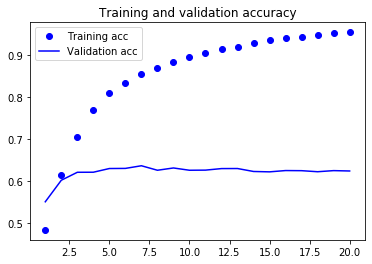

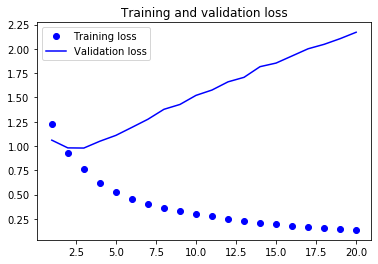

In [96]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [97]:
results = model.evaluate(X_test, y_test, verbose=2)
results # returns the loss value and accuracy

8510/8510 - 4s - loss: 2.0838 - acc: 0.6303


[2.083842955072674, 0.6303173]

In [98]:
# Save the Model
model.save('text_model_11.h5')

### Model #12 NonPT GRU Adam increase dropout 

In [109]:
from tensorflow.keras.layers import GRU, Embedding, Dense
from tensorflow.keras.models import Sequential

embedding_dim = 50
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(GRU(32, dropout = 0.2, recurrent_dropout = 0.2))
model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_32 (Embedding)     (None, 34, 50)            500000    
_________________________________________________________________
gru_14 (GRU)                 (None, 32)                8064      
_________________________________________________________________
dense_27 (Dense)             (None, 5)                 165       
Total params: 508,229
Trainable params: 508,229
Non-trainable params: 0
_________________________________________________________________


In [110]:
# Train the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2)

Train on 27228 samples, validate on 6808 samples
Epoch 1/20
27228/27228 [==============================] - 17s 609us/sample - loss: 1.2689 - acc: 0.4695 - val_loss: 1.1043 - val_acc: 0.5269
Epoch 2/20
27228/27228 [==============================] - 14s 505us/sample - loss: 1.0045 - acc: 0.5829 - val_loss: 1.0157 - val_acc: 0.5765
Epoch 3/20
27228/27228 [==============================] - 14s 510us/sample - loss: 0.8456 - acc: 0.6675 - val_loss: 0.9889 - val_acc: 0.6047
Epoch 4/20
27228/27228 [==============================] - 14s 498us/sample - loss: 0.7208 - acc: 0.7253 - val_loss: 1.0123 - val_acc: 0.6182
Epoch 5/20
27228/27228 [==============================] - 14s 510us/sample - loss: 0.6248 - acc: 0.7653 - val_loss: 1.0528 - val_acc: 0.6250
Epoch 6/20
27228/27228 [==============================] - 14s 513us/sample - loss: 0.5580 - acc: 0.7911 - val_loss: 1.0917 - val_acc: 0.6253
Epoch 7/20
27228/27228 [==============================] - 14s 528us/sample - loss: 0.5032 - acc: 0.8148 -

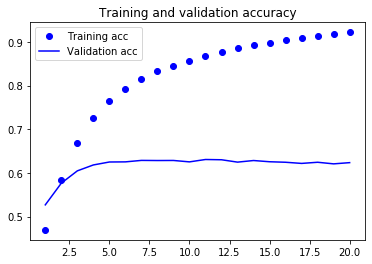

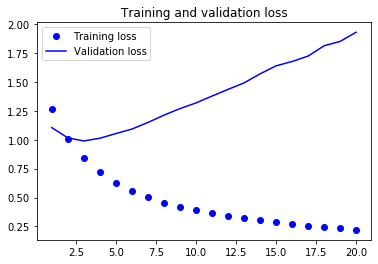

In [111]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [112]:
results = model.evaluate(X_test, y_test, verbose=2)
results # returns the loss value and accuracy

8510/8510 - 4s - loss: 1.8981 - acc: 0.6229


[1.898114839563919, 0.6229142]

### Model #13 PT LSTM RMSprop glove50

In [12]:
import os
glove_dir = 'C:/Users/maste/Desktop/DL/Week 7 RNN 2/glove.6B'

embeddings_index = {}
#file will be .50d, .100d or .200d based on dimension
f = open(os.path.join(glove_dir, 'glove.6B.50d.txt'), encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

# 50, 100 or 200
embedding_dim = 50

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

Found 400000 word vectors.


In [18]:
# Build the Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, LSTM
from tensorflow.keras import regularizers
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(32))
model.add(Dense(5, activation='softmax'))
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 34, 50)            500000    
_________________________________________________________________
lstm_10 (LSTM)               (None, 34, 32)            10624     
_________________________________________________________________
lstm_11 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 165       
Total params: 519,109
Trainable params: 19,109
Non-trainable params: 500,000
_________________________________________________________________


In [19]:
# Train the Model
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2)

Train on 27228 samples, validate on 6808 samples
Epoch 1/20
27228/27228 [==============================] - 14s 521us/sample - loss: 1.3135 - acc: 0.4631 - val_loss: 1.2595 - val_acc: 0.4794
Epoch 2/20
27228/27228 [==============================] - 5s 179us/sample - loss: 1.2336 - acc: 0.5027 - val_loss: 1.2200 - val_acc: 0.5029
Epoch 3/20
27228/27228 [==============================] - 5s 183us/sample - loss: 1.2039 - acc: 0.5177 - val_loss: 1.2418 - val_acc: 0.4943
Epoch 4/20
27228/27228 [==============================] - 6s 228us/sample - loss: 1.1825 - acc: 0.5263 - val_loss: 1.1888 - val_acc: 0.5253
Epoch 5/20
27228/27228 [==============================] - 7s 261us/sample - loss: 1.1616 - acc: 0.5350 - val_loss: 1.1965 - val_acc: 0.5151
Epoch 6/20
27228/27228 [==============================] - 6s 237us/sample - loss: 1.1459 - acc: 0.5424 - val_loss: 1.1624 - val_acc: 0.5357
Epoch 7/20
27228/27228 [==============================] - 7s 248us/sample - loss: 1.1302 - acc: 0.5480 - val_l

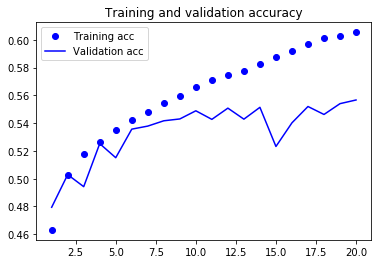

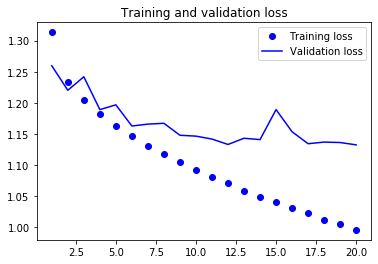

In [20]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [21]:
results = model.evaluate(X_test, y_test, verbose=2)
results # returns the loss value and accuracy

8510/8510 - 3s - loss: 1.1464 - acc: 0.5471


[1.146439734637107, 0.54712105]

### Model #14 PT LSTM RMSprop glove50 FT1

In [22]:
import os
glove_dir = 'C:/Users/maste/Desktop/DL/Week 7 RNN 2/glove.6B'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.50d.txt'), encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

embedding_dim = 50

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

Found 400000 word vectors.


In [27]:
# Build the Model
embedding_dim = 50

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, LSTM
from tensorflow.keras import regularizers
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(LSTM(32, recurrent_regularizer=regularizers.l2(0.01),return_sequences=True))
model.add(LSTM(32, recurrent_regularizer=regularizers.l2(0.01)))
model.add(Dense(5, activation='softmax'))
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 34, 50)            500000    
_________________________________________________________________
lstm_13 (LSTM)               (None, 34, 32)            10624     
_________________________________________________________________
lstm_14 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 165       
Total params: 519,109
Trainable params: 19,109
Non-trainable params: 500,000
_________________________________________________________________


In [28]:
# Train the Model
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2)

Train on 27228 samples, validate on 6808 samples
Epoch 1/20
27228/27228 [==============================] - 7s 240us/sample - loss: 1.4738 - acc: 0.4650 - val_loss: 1.3024 - val_acc: 0.4822
Epoch 2/20
27228/27228 [==============================] - 4s 135us/sample - loss: 1.2565 - acc: 0.5017 - val_loss: 1.2461 - val_acc: 0.4972
Epoch 3/20
27228/27228 [==============================] - 3s 94us/sample - loss: 1.2199 - acc: 0.5162 - val_loss: 1.2368 - val_acc: 0.5024
Epoch 4/20
27228/27228 [==============================] - 2s 88us/sample - loss: 1.1956 - acc: 0.5241 - val_loss: 1.2219 - val_acc: 0.5050
Epoch 5/20
27228/27228 [==============================] - 2s 82us/sample - loss: 1.1797 - acc: 0.5319 - val_loss: 1.1859 - val_acc: 0.5206
Epoch 6/20
27228/27228 [==============================] - 4s 153us/sample - loss: 1.1656 - acc: 0.5398 - val_loss: 1.1912 - val_acc: 0.5188
Epoch 7/20
27228/27228 [==============================] - 3s 117us/sample - loss: 1.1519 - acc: 0.5459 - val_loss:

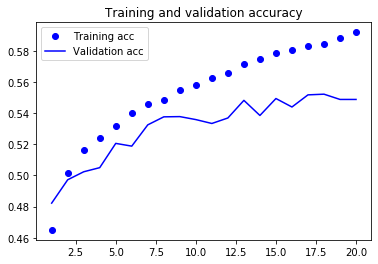

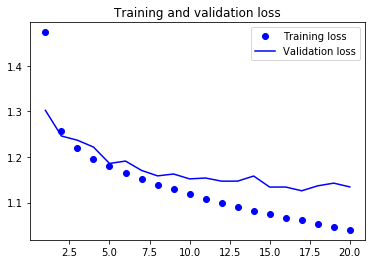

In [31]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [32]:
results = model.evaluate(X_test, y_test, verbose=2)
results # returns the loss value and accuracy

8510/8510 - 2s - loss: 1.1437 - acc: 0.5479


[1.1436806535888924, 0.5479436]

### Model #15 PT LSTM RMSprop glove100 (FT2)

In [104]:
import os
glove_dir = 'C:/Users/maste/Desktop/DL/Week 7 RNN 2/glove.6B'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

Found 400000 word vectors.


In [107]:
# Build the Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, LSTM
from tensorflow.keras import regularizers
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(LSTM(32, recurrent_regularizer=regularizers.l2(0.02),return_sequences=True))
model.add(LSTM(32, recurrent_regularizer=regularizers.l2(0.02),return_sequences=True))
model.add(LSTM(32, recurrent_regularizer=regularizers.l2(0.01)))
model.add(Dense(5, activation='softmax'))
model.layers[0].set_weights([embedding_matrix])
model.layers[2].trainable = False
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 34, 100)           1000000   
_________________________________________________________________
lstm_3 (LSTM)                (None, 34, 32)            17024     
_________________________________________________________________
lstm_4 (LSTM)                (None, 34, 32)            8320      
_________________________________________________________________
lstm_5 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 165       
Total params: 1,033,829
Trainable params: 1,025,509
Non-trainable params: 8,320
_________________________________________________________________


In [109]:
# Train the Model
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

history = model.fit(X_train, y_train,
                    epochs=12,
                    batch_size=128,
                    validation_split=0.2)

Train on 27228 samples, validate on 6808 samples
Epoch 1/12
27228/27228 [==============================] - 22s 809us/sample - loss: 2.0395 - acc: 0.4954 - val_loss: 1.8267 - val_acc: 0.5281
Epoch 2/12
27228/27228 [==============================] - 11s 402us/sample - loss: 1.7284 - acc: 0.5670 - val_loss: 1.7135 - val_acc: 0.5618
Epoch 3/12
27228/27228 [==============================] - 13s 479us/sample - loss: 1.6193 - acc: 0.6061 - val_loss: 1.6539 - val_acc: 0.5868
Epoch 4/12
27228/27228 [==============================] - 13s 477us/sample - loss: 1.5529 - acc: 0.6368 - val_loss: 1.6354 - val_acc: 0.5952
Epoch 5/12
27228/27228 [==============================] - 12s 423us/sample - loss: 1.5029 - acc: 0.6615 - val_loss: 1.6451 - val_acc: 0.5993
Epoch 6/12
27228/27228 [==============================] - 11s 414us/sample - loss: 1.4588 - acc: 0.6801 - val_loss: 1.6298 - val_acc: 0.6141
Epoch 7/12
27228/27228 [==============================] - 10s 385us/sample - loss: 1.4185 - acc: 0.7009 -

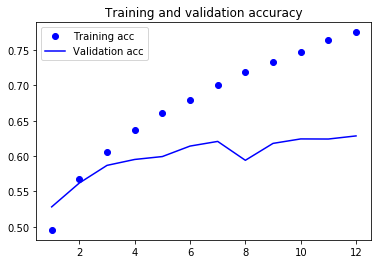

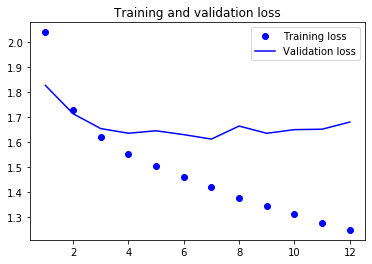

In [110]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [111]:
results = model.evaluate(X_test, y_test, verbose=2)
results # returns the loss value and accuracy

8510/8510 - 4s - loss: 1.6788 - acc: 0.6309


[1.6788121832523728, 0.6309048]

In [112]:
model.save('text_model_15.h5')

### Model #16 PT LSTM RMSprop glove200 decrease nodes in layers (FT3)

In [113]:
import os
glove_dir = 'C:/Users/maste/Desktop/DL/Week 7 RNN 2/glove.6B'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.200d.txt'), encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

embedding_dim = 200

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

Found 400000 word vectors.


In [118]:
# Build the Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, LSTM, Dropout
from tensorflow.keras import regularizers
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(LSTM(32, recurrent_regularizer=regularizers.l2(0.02),return_sequences=True, dropout = 0.2, recurrent_dropout = 0.2))
model.add(LSTM(32,return_sequences=True))
model.add(LSTM(32, recurrent_regularizer=regularizers.l2(0.01)))
model.add(Dense(5, activation='softmax'))
model.layers[0].set_weights([embedding_matrix])
model.layers[2].trainable = False
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 34, 200)           2000000   
_________________________________________________________________
lstm_12 (LSTM)               (None, 34, 32)            29824     
_________________________________________________________________
lstm_13 (LSTM)               (None, 34, 32)            8320      
_________________________________________________________________
lstm_14 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 165       
Total params: 2,046,629
Trainable params: 2,038,309
Non-trainable params: 8,320
_________________________________________________________________


In [119]:
# Train the Model
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

history = model.fit(X_train, y_train,
                    epochs=12,
                    batch_size=128,
                    validation_split=0.2)

Train on 27228 samples, validate on 6808 samples
Epoch 1/12
27228/27228 [==============================] - 21s 777us/sample - loss: 1.4828 - acc: 0.4877 - val_loss: 1.1527 - val_acc: 0.5486
Epoch 2/12
27228/27228 [==============================] - 17s 608us/sample - loss: 1.0814 - acc: 0.5715 - val_loss: 1.0373 - val_acc: 0.5845
Epoch 3/12
27228/27228 [==============================] - 16s 598us/sample - loss: 0.9728 - acc: 0.6105 - val_loss: 0.9953 - val_acc: 0.5999
Epoch 4/12
27228/27228 [==============================] - 17s 608us/sample - loss: 0.9063 - acc: 0.6417 - val_loss: 0.9726 - val_acc: 0.6102
Epoch 5/12
27228/27228 [==============================] - 17s 617us/sample - loss: 0.8534 - acc: 0.6648 - val_loss: 0.9633 - val_acc: 0.6178
Epoch 6/12
27228/27228 [==============================] - 17s 643us/sample - loss: 0.8048 - acc: 0.6882 - val_loss: 0.9992 - val_acc: 0.6150
Epoch 7/12
27228/27228 [==============================] - 17s 641us/sample - loss: 0.7612 - acc: 0.7086 -

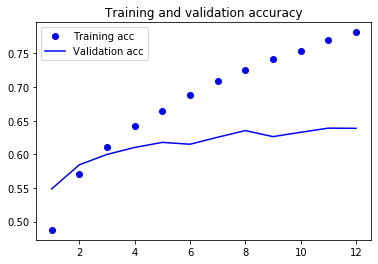

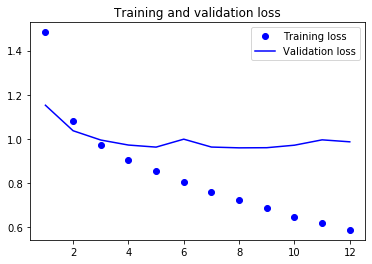

In [120]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [121]:
results = model.evaluate(X_test, y_test, verbose=2)
results # returns the loss value and accuracy

8510/8510 - 5s - loss: 0.9920 - acc: 0.6343


[0.9920371968373569, 0.63431257]

In [122]:
model.save('text_model_16.h5')

### Model #17 PT LSTM Adam glove100 Base

In [45]:
import os
glove_dir = 'C:/Users/maste/Desktop/DL/Week 7 RNN 2/glove.6B'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

Found 400000 word vectors.


In [46]:
# Build the Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, LSTM
from tensorflow.keras import regularizers
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(LSTM(32, recurrent_regularizer=regularizers.l2(0.01),return_sequences=True))
model.add(LSTM(32, recurrent_regularizer=regularizers.l2(0.01),return_sequences=True))
model.add(LSTM(32, recurrent_regularizer=regularizers.l2(0.01)))
model.add(Dense(5, activation='softmax'))
model.layers[0].set_weights([embedding_matrix])
model.layers[1].trainable = False
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 34, 100)           1000000   
_________________________________________________________________
lstm_20 (LSTM)               (None, 34, 32)            17024     
_________________________________________________________________
lstm_21 (LSTM)               (None, 34, 32)            8320      
_________________________________________________________________
lstm_22 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 165       
Total params: 1,033,829
Trainable params: 1,016,805
Non-trainable params: 17,024
_________________________________________________________________


In [47]:
# Train the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2)

Train on 27228 samples, validate on 6808 samples
Epoch 1/20
27228/27228 [==============================] - 11s 418us/sample - loss: 1.8453 - acc: 0.4554 - val_loss: 1.5262 - val_acc: 0.5223
Epoch 2/20
27228/27228 [==============================] - 5s 180us/sample - loss: 1.4130 - acc: 0.5668 - val_loss: 1.3895 - val_acc: 0.5707
Epoch 3/20
27228/27228 [==============================] - 5s 179us/sample - loss: 1.2566 - acc: 0.6318 - val_loss: 1.3397 - val_acc: 0.5914
Epoch 4/20
27228/27228 [==============================] - 5s 180us/sample - loss: 1.1483 - acc: 0.6808 - val_loss: 1.3507 - val_acc: 0.6053
Epoch 5/20
27228/27228 [==============================] - 5s 180us/sample - loss: 1.0598 - acc: 0.7175 - val_loss: 1.3662 - val_acc: 0.6063
Epoch 6/20
27228/27228 [==============================] - 5s 177us/sample - loss: 0.9827 - acc: 0.7541 - val_loss: 1.4119 - val_acc: 0.6152
Epoch 7/20
27228/27228 [==============================] - 5s 175us/sample - loss: 0.9136 - acc: 0.7848 - val_l

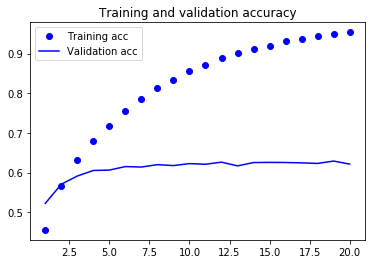

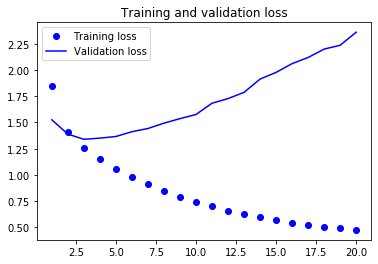

In [48]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [49]:
results = model.evaluate(X_test, y_test, verbose=2)
results # returns the loss value and accuracy

8510/8510 - 4s - loss: 2.2992 - acc: 0.6274


[2.2991861951897485, 0.62737954]

### Model #18 PT LSTM Adam glove200 add reg and dropout

In [31]:
import os
glove_dir = 'C:/Users/maste/Desktop/DL/Week 7 RNN 2/glove.6B'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.200d.txt'), encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

embedding_dim = 200

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

Found 400000 word vectors.


In [32]:
# Build the Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, LSTM, Dropout
from tensorflow.keras import regularizers
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(LSTM(64, recurrent_regularizer=regularizers.l2(0.01),return_sequences=True, dropout = 0.2, recurrent_dropout = 0.2))
model.add(LSTM(64, recurrent_regularizer=regularizers.l2(0.01),return_sequences=True, dropout = 0.2, recurrent_dropout = 0.2))
model.add(LSTM(32, recurrent_regularizer=regularizers.l2(0.01)))
model.add(Dense(5, activation='softmax'))
model.layers[0].set_weights([embedding_matrix])
model.layers[1].trainable = False
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 34, 200)           2000000   
_________________________________________________________________
lstm (LSTM)                  (None, 34, 64)            67840     
_________________________________________________________________
lstm_1 (LSTM)                (None, 34, 64)            33024     
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense (Dense)                (None, 5)                 165       
Total params: 2,113,445
Trainable params: 2,045,605
Non-trainable params: 67,840
_________________________________________________________________


In [33]:
# Train the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 27228 samples, validate on 6808 samples
Epoch 1/10
27228/27228 [==============================] - 41s 2ms/sample - loss: 2.1764 - acc: 0.4600 - val_loss: 1.8221 - val_acc: 0.5260
Epoch 2/10
27228/27228 [==============================] - 27s 983us/sample - loss: 1.7687 - acc: 0.5464 - val_loss: 1.6883 - val_acc: 0.5840
Epoch 3/10
27228/27228 [==============================] - 27s 981us/sample - loss: 1.6445 - acc: 0.5977 - val_loss: 1.6402 - val_acc: 0.6040
Epoch 4/10
27228/27228 [==============================] - 30s 1ms/sample - loss: 1.5615 - acc: 0.6314 - val_loss: 1.6214 - val_acc: 0.6109
Epoch 5/10
27228/27228 [==============================] - 30s 1ms/sample - loss: 1.4974 - acc: 0.6676 - val_loss: 1.5925 - val_acc: 0.6218
Epoch 6/10
27228/27228 [==============================] - 31s 1ms/sample - loss: 1.4358 - acc: 0.6936 - val_loss: 1.6052 - val_acc: 0.6326
Epoch 7/10
27228/27228 [==============================] - 31s 1ms/sample - loss: 1.3838 - acc: 0.7166 - val_loss:

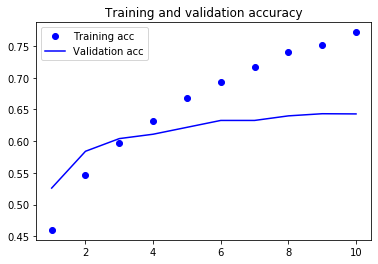

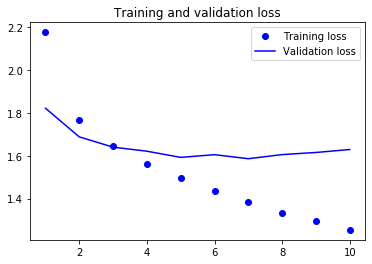

In [34]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [35]:
results = model.evaluate(X_test, y_test, verbose=2)
results # returns the loss value and accuracy

8510/8510 - 7s - loss: 1.6351 - acc: 0.6363


[1.6350606343440808, 0.6363102]

In [36]:
model.save('text_model_18.h5')

### Model #19 PT LSTM Adam glove200 FT1

In [15]:
import os
glove_dir = 'C:/Users/maste/Desktop/DL/Week 7 RNN 2/glove.6B'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.200d.txt'), encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

embedding_dim = 200

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

Found 400000 word vectors.


In [16]:
# Build the Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, LSTM, Dropout
from tensorflow.keras import regularizers
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(LSTM(64, recurrent_regularizer=regularizers.l2(0.01),return_sequences=True, dropout = 0.3, recurrent_dropout = 0.3))
model.add(LSTM(64, recurrent_regularizer=regularizers.l2(0.01),return_sequences=True, dropout = 0.3, recurrent_dropout = 0.3))
model.add(LSTM(32, recurrent_regularizer=regularizers.l2(0.01),return_sequences=True, dropout = 0.3, recurrent_dropout = 0.3))
model.add(LSTM(32, recurrent_regularizer=regularizers.l2(0.01)))
model.add(Dense(5, activation='softmax'))
model.layers[0].set_weights([embedding_matrix])
model.layers[1].trainable = False
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 34, 200)           2000000   
_________________________________________________________________
lstm (LSTM)                  (None, 34, 64)            67840     
_________________________________________________________________
lstm_1 (LSTM)                (None, 34, 64)            33024     
_________________________________________________________________
lstm_2 (LSTM)                (None, 34, 32)            12416     
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 165       
Total params: 2,121,765
Trainable params: 2,053,925
Non-trainable params: 67,840
_______________________________________

In [17]:
# Train the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 27228 samples, validate on 6808 samples
Epoch 1/10
27228/27228 [==============================] - 46s 2ms/sample - loss: 2.3091 - acc: 0.4372 - val_loss: 1.8755 - val_acc: 0.4956
Epoch 2/10
27228/27228 [==============================] - 39s 1ms/sample - loss: 1.8363 - acc: 0.5106 - val_loss: 1.7391 - val_acc: 0.5539
Epoch 3/10
27228/27228 [==============================] - 43s 2ms/sample - loss: 1.7357 - acc: 0.5553 - val_loss: 1.6815 - val_acc: 0.5831
Epoch 4/10
27228/27228 [==============================] - 43s 2ms/sample - loss: 1.6701 - acc: 0.5860 - val_loss: 1.6604 - val_acc: 0.5839
Epoch 5/10
27228/27228 [==============================] - 44s 2ms/sample - loss: 1.6197 - acc: 0.6087 - val_loss: 1.6339 - val_acc: 0.5986
Epoch 6/10
27228/27228 [==============================] - 45s 2ms/sample - loss: 1.5726 - acc: 0.6283 - val_loss: 1.6194 - val_acc: 0.6052
Epoch 7/10
27228/27228 [==============================] - 46s 2ms/sample - loss: 1.5331 - acc: 0.6475 - val_loss: 1.6

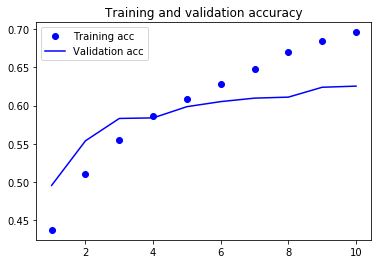

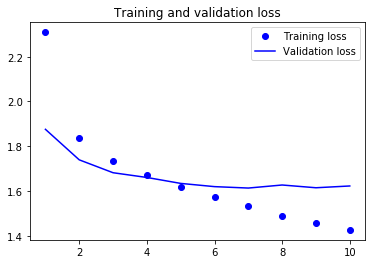

In [18]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [19]:
results = model.evaluate(X_test, y_test, verbose=2)
results # returns the loss value and accuracy

8510/8510 - 8s - loss: 1.6291 - acc: 0.6202


[1.6290599204678653, 0.62021154]

### Model #20 PT GRU Adam glove100 Base

In [10]:
import os

glove_dir = 'C:/Users/maste/Desktop/DL/Week 7 RNN 2/glove.6B'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

Found 400000 word vectors.


In [11]:
from tensorflow.keras.layers import GRU, Embedding, Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(GRU(32, return_sequences=True, dropout = 0.2, recurrent_dropout = 0.2))
model.add(GRU(32))
model.add(Dense(5, activation='softmax'))
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 34, 100)           1000000   
_________________________________________________________________
gru (GRU)                    (None, 34, 32)            12864     
_________________________________________________________________
gru_1 (GRU)                  (None, 32)                6336      
_________________________________________________________________
dense (Dense)                (None, 5)                 165       
Total params: 1,019,365
Trainable params: 19,365
Non-trainable params: 1,000,000
_________________________________________________________________


In [12]:
# Train the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

history = model.fit(X_train, y_train,
                    epochs=15,
                    batch_size=128,
                    validation_split=0.2)

Train on 27228 samples, validate on 6808 samples
Epoch 1/15
27228/27228 [==============================] - 26s 954us/sample - loss: 1.3535 - acc: 0.4451 - val_loss: 1.2365 - val_acc: 0.5019
Epoch 2/15
27228/27228 [==============================] - 14s 508us/sample - loss: 1.2230 - acc: 0.5062 - val_loss: 1.1804 - val_acc: 0.5264
Epoch 3/15
27228/27228 [==============================] - 13s 463us/sample - loss: 1.1805 - acc: 0.5277 - val_loss: 1.1522 - val_acc: 0.5395
Epoch 4/15
27228/27228 [==============================] - 12s 456us/sample - loss: 1.1513 - acc: 0.5370 - val_loss: 1.1384 - val_acc: 0.5457
Epoch 5/15
27228/27228 [==============================] - 13s 466us/sample - loss: 1.1336 - acc: 0.5480 - val_loss: 1.1289 - val_acc: 0.5470
Epoch 6/15
27228/27228 [==============================] - 13s 471us/sample - loss: 1.1190 - acc: 0.5526 - val_loss: 1.1237 - val_acc: 0.5545
Epoch 7/15
27228/27228 [==============================] - 13s 479us/sample - loss: 1.1085 - acc: 0.5578 -

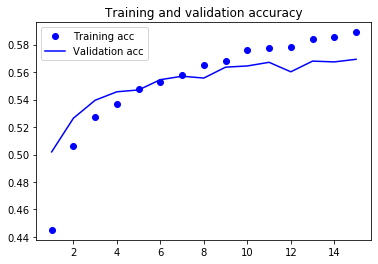

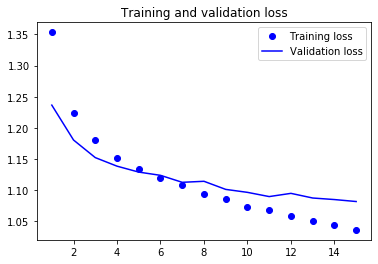

In [13]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [14]:
results = model.evaluate(X_test, y_test, verbose=2)
results # returns the loss value and accuracy

8510/8510 - 4s - loss: 1.0892 - acc: 0.5598


[1.0892318515463806, 0.559812]

### Model #21 PT GRU Adam glove200 FT1

In [21]:
import os
glove_dir = 'C:/Users/maste/Desktop/DL/Week 7 RNN 2/glove.6B'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.200d.txt'), encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

embedding_dim = 200

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

Found 400000 word vectors.


In [22]:
from tensorflow.keras.layers import GRU, Embedding, Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(GRU(64, return_sequences=True, dropout = 0.2, recurrent_dropout = 0.2))
model.add(GRU(32, return_sequences=True, dropout = 0.1, recurrent_dropout = 0.1))
model.add(GRU(32))
model.add(Dense(5, activation='softmax'))
model.layers[0].set_weights([embedding_matrix])
model.layers[1].trainable = False
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 34, 200)           2000000   
_________________________________________________________________
gru_2 (GRU)                  (None, 34, 64)            51072     
_________________________________________________________________
gru_3 (GRU)                  (None, 34, 32)            9408      
_________________________________________________________________
gru_4 (GRU)                  (None, 32)                6336      
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 165       
Total params: 2,066,981
Trainable params: 2,015,909
Non-trainable params: 51,072
_________________________________________________________________


In [23]:
# Train the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

history = model.fit(X_train, y_train,
                    epochs=12,
                    batch_size=128,
                    validation_split=0.2)

Train on 27228 samples, validate on 6808 samples
Epoch 1/12
27228/27228 [==============================] - 29s 1ms/sample - loss: 1.3084 - acc: 0.4639 - val_loss: 1.1175 - val_acc: 0.5464
Epoch 2/12
27228/27228 [==============================] - 25s 903us/sample - loss: 1.0661 - acc: 0.5681 - val_loss: 0.9964 - val_acc: 0.5961
Epoch 3/12
27228/27228 [==============================] - 26s 953us/sample - loss: 0.9353 - acc: 0.6277 - val_loss: 0.9527 - val_acc: 0.6162
Epoch 4/12
27228/27228 [==============================] - 26s 967us/sample - loss: 0.8459 - acc: 0.6680 - val_loss: 0.9410 - val_acc: 0.6301
Epoch 5/12
27228/27228 [==============================] - 27s 994us/sample - loss: 0.7665 - acc: 0.7029 - val_loss: 0.9453 - val_acc: 0.6357
Epoch 6/12
27228/27228 [==============================] - 27s 1ms/sample - loss: 0.7068 - acc: 0.7317 - val_loss: 0.9536 - val_acc: 0.6392
Epoch 7/12
27228/27228 [==============================] - 27s 1ms/sample - loss: 0.6499 - acc: 0.7504 - val_l

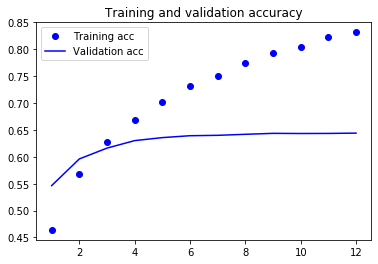

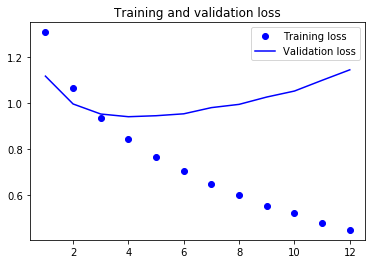

In [24]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [25]:
results = model.evaluate(X_test, y_test, verbose=2)
results # returns the loss value and accuracy

8510/8510 - 6s - loss: 1.1327 - acc: 0.6437


[1.1326846046537407, 0.6437133]

In [26]:
model.save('text_model_21.h5')

### Model #22 PT GRU RMSprop glove100 Base

In [27]:
import os

glove_dir = 'C:/Users/maste/Desktop/DL/Week 7 RNN 2/glove.6B'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

Found 400000 word vectors.


In [28]:
from tensorflow.keras.layers import GRU, Embedding, Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(GRU(64, return_sequences=True, dropout = 0.2, recurrent_dropout = 0.2))
model.add(GRU(32, return_sequences=True, dropout = 0.1, recurrent_dropout = 0.1))
model.add(GRU(32))
model.add(Dense(5, activation='softmax'))
model.layers[0].set_weights([embedding_matrix])
model.layers[1].trainable = False
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 34, 100)           1000000   
_________________________________________________________________
gru_5 (GRU)                  (None, 34, 64)            31872     
_________________________________________________________________
gru_6 (GRU)                  (None, 34, 32)            9408      
_________________________________________________________________
gru_7 (GRU)                  (None, 32)                6336      
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 165       
Total params: 1,047,781
Trainable params: 1,015,909
Non-trainable params: 31,872
_________________________________________________________________


In [29]:
# Train the Model
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

history = model.fit(X_train, y_train,
                    epochs=12,
                    batch_size=128,
                    validation_split=0.2)

Train on 27228 samples, validate on 6808 samples
Epoch 1/12
27228/27228 [==============================] - 31s 1ms/sample - loss: 1.3473 - acc: 0.4471 - val_loss: 1.2122 - val_acc: 0.5065
Epoch 2/12
27228/27228 [==============================] - 25s 909us/sample - loss: 1.1877 - acc: 0.5158 - val_loss: 1.0887 - val_acc: 0.5574
Epoch 3/12
27228/27228 [==============================] - 26s 939us/sample - loss: 1.0844 - acc: 0.5550 - val_loss: 1.0244 - val_acc: 0.5783
Epoch 4/12
27228/27228 [==============================] - 26s 942us/sample - loss: 1.0210 - acc: 0.5806 - val_loss: 1.0020 - val_acc: 0.5900
Epoch 5/12
27228/27228 [==============================] - 26s 948us/sample - loss: 0.9795 - acc: 0.6010 - val_loss: 0.9750 - val_acc: 0.5969
Epoch 6/12
27228/27228 [==============================] - 27s 1ms/sample - loss: 0.9502 - acc: 0.6154 - val_loss: 0.9587 - val_acc: 0.6091
Epoch 7/12
27228/27228 [==============================] - 26s 953us/sample - loss: 0.9200 - acc: 0.6279 - val

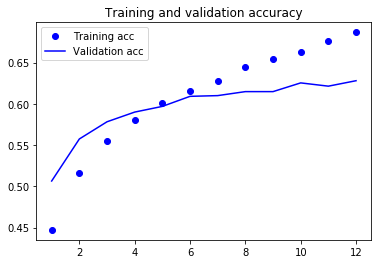

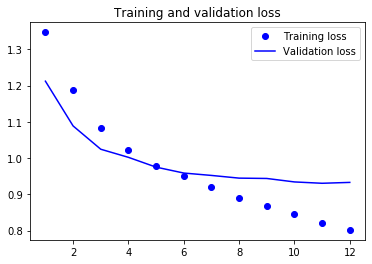

In [30]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [31]:
results = model.evaluate(X_test, y_test, verbose=2)
results # returns the loss value and accuracy

8510/8510 - 6s - loss: 0.9265 - acc: 0.6278


[0.9265411731499202, 0.6278496]

In [32]:
model.save('text_model_22.h5')

### Model #23 PT GRU RMSprop glove100 FT1

In [55]:
import os

glove_dir = 'C:/Users/maste/Desktop/DL/Week 7 RNN 2/glove.6B'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

Found 400000 word vectors.


In [56]:
from tensorflow.keras.layers import GRU, Embedding, Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(GRU(128, return_sequences=True, dropout = 0.1, recurrent_dropout = 0.1))
model.add(GRU(32))
model.add(Dense(5, activation='softmax'))
model.layers[0].set_weights([embedding_matrix])
model.layers[1].trainable = False
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 34, 100)           1000000   
_________________________________________________________________
gru_21 (GRU)                 (None, 34, 128)           88320     
_________________________________________________________________
gru_22 (GRU)                 (None, 32)                15552     
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 165       
Total params: 1,104,037
Trainable params: 1,015,717
Non-trainable params: 88,320
_________________________________________________________________


In [57]:
# Train the Model
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 27228 samples, validate on 6808 samples
Epoch 1/10
27228/27228 [==============================] - 17s 632us/sample - loss: 1.3138 - acc: 0.4597 - val_loss: 1.1664 - val_acc: 0.5272
Epoch 2/10
27228/27228 [==============================] - 15s 539us/sample - loss: 1.1033 - acc: 0.5494 - val_loss: 1.0393 - val_acc: 0.5712
Epoch 3/10
27228/27228 [==============================] - 15s 542us/sample - loss: 1.0049 - acc: 0.5899 - val_loss: 0.9855 - val_acc: 0.6003
Epoch 4/10
27228/27228 [==============================] - 16s 570us/sample - loss: 0.9462 - acc: 0.6172 - val_loss: 0.9714 - val_acc: 0.6041
Epoch 5/10
27228/27228 [==============================] - 16s 587us/sample - loss: 0.9046 - acc: 0.6343 - val_loss: 0.9501 - val_acc: 0.6141
Epoch 6/10
27228/27228 [==============================] - 17s 606us/sample - loss: 0.8679 - acc: 0.6516 - val_loss: 0.9592 - val_acc: 0.6097
Epoch 7/10
27228/27228 [==============================] - 17s 628us/sample - loss: 0.8322 - acc: 0.6734 -

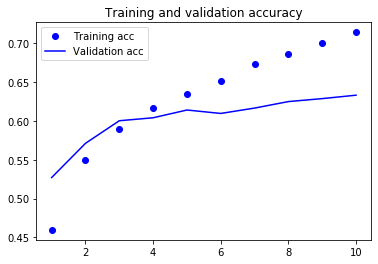

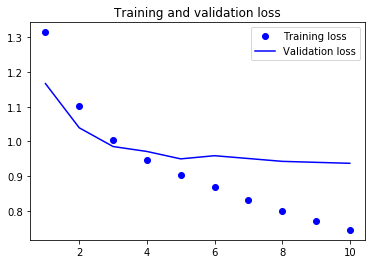

In [58]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [59]:
results = model.evaluate(X_test, y_test, verbose=2)
results # returns the loss value and accuracy

8510/8510 - 4s - loss: 0.9330 - acc: 0.6316


[0.9329513919479558, 0.63160986]

In [60]:
model.save('text_model_23.h5')

### Model #24 PT GRU Adam FT2

In [43]:
import os
glove_dir = 'C:/Users/maste/Desktop/DL/Week 7 RNN 2/glove.6B'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.200d.txt'), encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

embedding_dim = 200

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

Found 400000 word vectors.


In [44]:
from tensorflow.keras.layers import GRU, Embedding, Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(GRU(64, return_sequences=True, dropout = 0.1, recurrent_dropout = 0.1))
model.add(GRU(128, return_sequences=True, dropout = 0.1, recurrent_dropout = 0.1))
model.add(GRU(32))
model.add(Dense(5, activation='softmax'))
model.layers[0].set_weights([embedding_matrix])
model.layers[1].trainable = False
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 34, 200)           2000000   
_________________________________________________________________
gru_15 (GRU)                 (None, 34, 64)            51072     
_________________________________________________________________
gru_16 (GRU)                 (None, 34, 128)           74496     
_________________________________________________________________
gru_17 (GRU)                 (None, 32)                15552     
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 165       
Total params: 2,141,285
Trainable params: 2,090,213
Non-trainable params: 51,072
_________________________________________________________________


In [45]:
# Train the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 27228 samples, validate on 6808 samples
Epoch 1/10
27228/27228 [==============================] - 30s 1ms/sample - loss: 1.2597 - acc: 0.4903 - val_loss: 1.0823 - val_acc: 0.5615
Epoch 2/10
27228/27228 [==============================] - 27s 979us/sample - loss: 1.0168 - acc: 0.5881 - val_loss: 0.9828 - val_acc: 0.6008
Epoch 3/10
27228/27228 [==============================] - 28s 1ms/sample - loss: 0.8813 - acc: 0.6470 - val_loss: 0.9504 - val_acc: 0.6171
Epoch 4/10
27228/27228 [==============================] - 30s 1ms/sample - loss: 0.7847 - acc: 0.6929 - val_loss: 0.9501 - val_acc: 0.6287
Epoch 5/10
27228/27228 [==============================] - 30s 1ms/sample - loss: 0.7049 - acc: 0.7287 - val_loss: 0.9593 - val_acc: 0.6357
Epoch 6/10
27228/27228 [==============================] - 31s 1ms/sample - loss: 0.6244 - acc: 0.7610 - val_loss: 0.9993 - val_acc: 0.6347
Epoch 7/10
27228/27228 [==============================] - 31s 1ms/sample - loss: 0.5660 - acc: 0.7853 - val_loss: 1

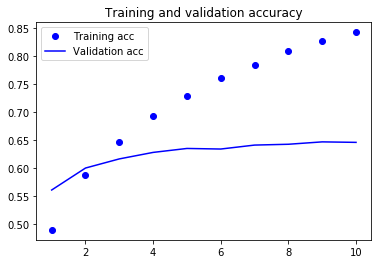

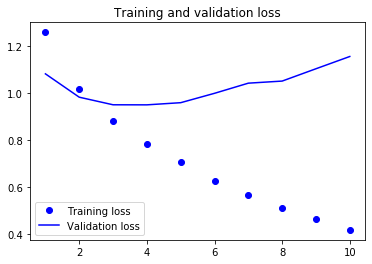

In [46]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [48]:
results = model.evaluate(X_test, y_test, verbose=2)
results # returns the loss value and accuracy

8510/8510 - 6s - loss: 1.1292 - acc: 0.6454


[1.1291882836580556, 0.6453584]

In [47]:
model.save('text_model_24.h5')

### Model #25 PT GRU Adam FT3

In [49]:
import os
glove_dir = 'C:/Users/maste/Desktop/DL/Week 7 RNN 2/glove.6B'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.200d.txt'), encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

embedding_dim = 200

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

Found 400000 word vectors.


In [50]:
from tensorflow.keras.layers import GRU, Embedding, Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(GRU(128, return_sequences=True, dropout = 0.1, recurrent_dropout = 0.1))
model.add(GRU(256, return_sequences=True, dropout = 0.1, recurrent_dropout = 0.1))
model.add(GRU(32))
model.add(Dense(5, activation='softmax'))
model.layers[0].set_weights([embedding_matrix])
model.layers[1].trainable = False
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 34, 200)           2000000   
_________________________________________________________________
gru_18 (GRU)                 (None, 34, 128)           126720    
_________________________________________________________________
gru_19 (GRU)                 (None, 34, 256)           296448    
_________________________________________________________________
gru_20 (GRU)                 (None, 32)                27840     
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 165       
Total params: 2,451,173
Trainable params: 2,324,453
Non-trainable params: 126,720
_________________________________________________________________


In [51]:
# Train the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

history = model.fit(X_train, y_train,
                    epochs=8,
                    batch_size=128,
                    validation_split=0.2)

Train on 27228 samples, validate on 6808 samples
Epoch 1/8
27228/27228 [==============================] - 30s 1ms/sample - loss: 1.2168 - acc: 0.5061 - val_loss: 1.0511 - val_acc: 0.5790
Epoch 2/8
27228/27228 [==============================] - 26s 961us/sample - loss: 0.9745 - acc: 0.6076 - val_loss: 0.9622 - val_acc: 0.6084
Epoch 3/8
27228/27228 [==============================] - 28s 1ms/sample - loss: 0.8446 - acc: 0.6662 - val_loss: 0.9300 - val_acc: 0.6323
Epoch 4/8
27228/27228 [==============================] - 30s 1ms/sample - loss: 0.7541 - acc: 0.7053 - val_loss: 0.9259 - val_acc: 0.6363
Epoch 5/8
27228/27228 [==============================] - 30s 1ms/sample - loss: 0.6608 - acc: 0.7457 - val_loss: 0.9518 - val_acc: 0.6422
Epoch 6/8
27228/27228 [==============================] - 32s 1ms/sample - loss: 0.5879 - acc: 0.7748 - val_loss: 0.9907 - val_acc: 0.6369
Epoch 7/8
27228/27228 [==============================] - 32s 1ms/sample - loss: 0.5138 - acc: 0.8091 - val_loss: 1.0288 -

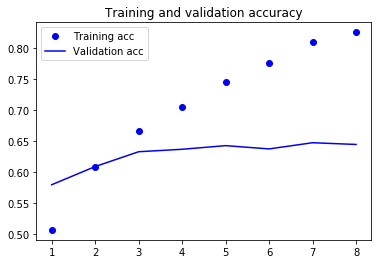

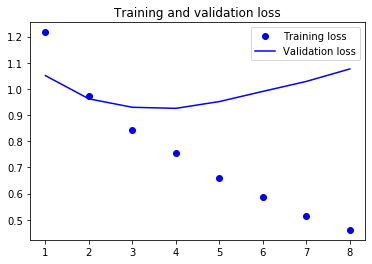

In [52]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [53]:
results = model.evaluate(X_test, y_test, verbose=2)
results # returns the loss value and accuracy

8510/8510 - 7s - loss: 1.0703 - acc: 0.6469


[1.0703108439014044, 0.646886]

In [ ]:
model.save('text_model_25.h5')

## Step 4 – Use the Best Model to make prediction

Test texts:

I am so happy today! ❤

So excited!!! 😍

Let's take a picture here 📷

I'm in Love... 😍 or ❤

Cooking my lunch now 🔥

Flaming hot oven 🔥

HAHAHAHAHA so funny! 😂

Heart of stone ❤

Cold Black Icy Heart ❤

Ready the camera and Say Cheese 📷

#### Test Model #25 (6/10)

In [7]:
from tensorflow.keras import models
model = models.load_model('text_model_25.h5')

In [25]:
# takes the user input
text_input = np.array([input("Enter some text here: ")])

Enter some text here: I am so happy today!


In [26]:
# convert the user input into numeric tensor
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

def input_to_tensor(text_input):
    tokenizer.fit_on_texts(text_input)
    sequences = tokenizer.texts_to_sequences(text_input)
    data = pad_sequences(sequences, maxlen=max_len)
    return data

def prediction(model, data, emoji_dictionary):
    prob = model.predict(data)
    pro_df = pd.DataFrame(prob, columns = emoji_dictionary)
    result = emoji_dictionary[np.argmax(prob)]
    return pro_df, result

In [27]:
# show the model output using predict function
data = input_to_tensor(text_input)
pro_df, result = prediction(model, data, emoji_dictionary)
print(f'The prediction for {text_input} is: {result}\n\n', pro_df)

The prediction for ['I am so happy today!'] is: ❤

           0        1         2        3         4
0  0.404229  0.09507  0.002126  0.00471  0.493865


In [21]:
# takes the user input
text_input = np.array([input("Enter some text here: ")])

Enter some text here: So excited!!!


In [22]:
# show the model output using predict function
data = input_to_tensor(text_input)
pro_df, result = prediction(model, data, emoji_dictionary)
print(f'The prediction for {text_input} is: {result}\n\n', pro_df)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0  21 325]]
The prediction for ['So excited!!!'] is: 😍

           0         1         2         3         4
0  0.520195  0.180912  0.007403  0.041378  0.250111


In [28]:
# takes the user input
text_input = np.array([input("Enter some text here: ")])

Enter some text here: Let's take a picture here


In [29]:
# show the model output using predict function
data = input_to_tensor(text_input)
pro_df, result = prediction(model, data, emoji_dictionary)
print(f'The prediction for {text_input} is: {result}\n\n', pro_df)

The prediction for ["Let's take a picture here"] is: ❤

           0         1         2         3         4
0  0.108989  0.405552  0.004262  0.067371  0.413826


In [30]:
# takes the user input
text_input = np.array([input("Enter some text here: ")])

Enter some text here: I'm in Love...


In [31]:
# show the model output using predict function
data = input_to_tensor(text_input)
pro_df, result = prediction(model, data, emoji_dictionary)
print(f'The prediction for {text_input} is: {result}\n\n', pro_df)

The prediction for ["I'm in Love..."] is: ❤

           0         1         2         3         4
0  0.451781  0.043518  0.004327  0.009094  0.491279


In [32]:
# takes the user input
text_input = np.array([input("Enter some text here: ")])

Enter some text here: Cooking my lunch now


In [33]:
# show the model output using predict function
data = input_to_tensor(text_input)
pro_df, result = prediction(model, data, emoji_dictionary)
print(f'The prediction for {text_input} is: {result}\n\n', pro_df)

The prediction for ['Cooking my lunch now'] is: 🔥

           0         1         2         3         4
0  0.355473  0.204853  0.003495  0.373359  0.062821


In [34]:
# takes the user input
text_input = np.array([input("Enter some text here: ")])

Enter some text here: Flaming hot oven


In [35]:
# show the model output using predict function
data = input_to_tensor(text_input)
pro_df, result = prediction(model, data, emoji_dictionary)
print(f'The prediction for {text_input} is: {result}\n\n', pro_df)

The prediction for ['Flaming hot oven'] is: 😍

           0         1         2         3         4
0  0.623973  0.099847  0.002141  0.002166  0.271872


In [36]:
# takes the user input
text_input = np.array([input("Enter some text here: ")])

Enter some text here: HAHAHAHAHA so funny!


In [37]:
# show the model output using predict function
data = input_to_tensor(text_input)
pro_df, result = prediction(model, data, emoji_dictionary)
print(f'The prediction for {text_input} is: {result}\n\n', pro_df)

The prediction for ['HAHAHAHAHA so funny!'] is: 😂

           0         1         2         3         4
0  0.135997  0.677366  0.015021  0.090355  0.081261


In [38]:
# takes the user input
text_input = np.array([input("Enter some text here: ")])

Enter some text here: Heart of stone


In [39]:
# show the model output using predict function
data = input_to_tensor(text_input)
pro_df, result = prediction(model, data, emoji_dictionary)
print(f'The prediction for {text_input} is: {result}\n\n', pro_df)

The prediction for ['Heart of stone'] is: ❤

           0         1         2        3         4
0  0.045508  0.001756  0.001105  0.00106  0.950571


In [40]:
# takes the user input
text_input = np.array([input("Enter some text here: ")])

Enter some text here: Cold Black Icy Heart


In [41]:
# show the model output using predict function
data = input_to_tensor(text_input)
pro_df, result = prediction(model, data, emoji_dictionary)
print(f'The prediction for {text_input} is: {result}\n\n', pro_df)

The prediction for ['Cold Black Icy Heart'] is: 😍

           0         1         2         3         4
0  0.462603  0.014367  0.001197  0.109325  0.412508


In [42]:
# takes the user input
text_input = np.array([input("Enter some text here: ")])

Enter some text here: Ready the camera and Say Cheese


In [43]:
# show the model output using predict function
data = input_to_tensor(text_input)
pro_df, result = prediction(model, data, emoji_dictionary)
print(f'The prediction for {text_input} is: {result}\n\n', pro_df)

The prediction for ['Ready the camera and Say Cheese'] is: 🔥

           0         1        2         3         4
0  0.007936  0.236903  0.00969  0.719556  0.025916


Test texts:

I am so happy today! ❤

So excited!!! 😍

Let's take a picture here 📷

I'm in Love... 😍 or ❤

Cooking my lunch now 🔥

Flaming hot oven 🔥

HAHAHAHAHA so funny! 😂

Heart of stone ❤

Cold Black Icy Heart ❤

Ready the camera and Say Cheese 📷

#### Test Model #18 (4/10)

In [44]:
from tensorflow.keras import models
model = models.load_model('text_model_18.h5')

In [45]:
# takes the user input
text_input = np.array([input("Enter some text here: ")])

Enter some text here: I am so happy today!


In [46]:
# convert the user input into numeric tensor
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

def input_to_tensor(text_input):
    tokenizer.fit_on_texts(text_input)
    sequences = tokenizer.texts_to_sequences(text_input)
    data = pad_sequences(sequences, maxlen=max_len)
    return data

def prediction(model, data, emoji_dictionary):
    prob = model.predict(data)
    pro_df = pd.DataFrame(prob, columns = emoji_dictionary)
    result = emoji_dictionary[np.argmax(prob)]
    return pro_df, result

In [47]:
# show the model output using predict function
data = input_to_tensor(text_input)
pro_df, result = prediction(model, data, emoji_dictionary)
print(f'The prediction for {text_input} is: {result}\n\n', pro_df)

The prediction for ['I am so happy today!'] is: ❤

           0         1        2         3         4
0  0.291366  0.043753  0.00193  0.004122  0.658829


In [48]:
# takes the user input
text_input = np.array([input("Enter some text here: ")])

Enter some text here: So excited!!!


In [49]:
# show the model output using predict function
data = input_to_tensor(text_input)
pro_df, result = prediction(model, data, emoji_dictionary)
print(f'The prediction for {text_input} is: {result}\n\n', pro_df)

The prediction for ['So excited!!!'] is: 😍

           0         1         2         3         4
0  0.385267  0.199013  0.040487  0.057757  0.317476


In [50]:
# takes the user input
text_input = np.array([input("Enter some text here: ")])

Enter some text here: Let's take a picture here


In [51]:
# show the model output using predict function
data = input_to_tensor(text_input)
pro_df, result = prediction(model, data, emoji_dictionary)
print(f'The prediction for {text_input} is: {result}\n\n', pro_df)

The prediction for ["Let's take a picture here"] is: 😂

           0         1         2         3         4
0  0.089794  0.557936  0.057107  0.196409  0.098755


In [52]:
# takes the user input
text_input = np.array([input("Enter some text here: ")])

Enter some text here: I'm in Love...


In [53]:
# show the model output using predict function
data = input_to_tensor(text_input)
pro_df, result = prediction(model, data, emoji_dictionary)
print(f'The prediction for {text_input} is: {result}\n\n', pro_df)

The prediction for ["I'm in Love..."] is: ❤

           0         1         2         3         4
0  0.401597  0.084757  0.016501  0.031593  0.465552


In [54]:
# takes the user input
text_input = np.array([input("Enter some text here: ")])

Enter some text here: Cooking my lunch now


In [55]:
# show the model output using predict function
data = input_to_tensor(text_input)
pro_df, result = prediction(model, data, emoji_dictionary)
print(f'The prediction for {text_input} is: {result}\n\n', pro_df)

The prediction for ['Cooking my lunch now'] is: ❤

           0         1         2         3         4
0  0.411203  0.057232  0.007377  0.010809  0.513379


In [56]:
# takes the user input
text_input = np.array([input("Enter some text here: ")])

Enter some text here: Flaming hot oven


In [57]:
# show the model output using predict function
data = input_to_tensor(text_input)
pro_df, result = prediction(model, data, emoji_dictionary)
print(f'The prediction for {text_input} is: {result}\n\n', pro_df)

The prediction for ['Flaming hot oven'] is: 😂

           0         1         2         3         4
0  0.027179  0.798547  0.059808  0.017628  0.096839


In [58]:
# takes the user input
text_input = np.array([input("Enter some text here: ")])

Enter some text here: HAHAHAHAHA so funny!


In [59]:
# show the model output using predict function
data = input_to_tensor(text_input)
pro_df, result = prediction(model, data, emoji_dictionary)
print(f'The prediction for {text_input} is: {result}\n\n', pro_df)

The prediction for ['HAHAHAHAHA so funny!'] is: 😂

           0         1         2        3         4
0  0.209058  0.418094  0.060074  0.10135  0.211423


In [60]:
# takes the user input
text_input = np.array([input("Enter some text here: ")])

Enter some text here: Heart of stone


In [61]:
# show the model output using predict function
data = input_to_tensor(text_input)
pro_df, result = prediction(model, data, emoji_dictionary)
print(f'The prediction for {text_input} is: {result}\n\n', pro_df)

The prediction for ['Heart of stone'] is: 😂

           0         1         2         3         4
0  0.200499  0.429852  0.026218  0.096097  0.247334


In [62]:
# takes the user input
text_input = np.array([input("Enter some text here: ")])

Enter some text here: Cold Black Icy Heart


In [63]:
# show the model output using predict function
data = input_to_tensor(text_input)
pro_df, result = prediction(model, data, emoji_dictionary)
print(f'The prediction for {text_input} is: {result}\n\n', pro_df)

The prediction for ['Cold Black Icy Heart'] is: 🔥

           0         1        2        3         4
0  0.180826  0.087172  0.01982  0.44001  0.272171


In [64]:
# takes the user input
text_input = np.array([input("Enter some text here: ")])

Enter some text here: Ready the camera and Say Cheese


In [65]:
# show the model output using predict function
data = input_to_tensor(text_input)
pro_df, result = prediction(model, data, emoji_dictionary)
print(f'The prediction for {text_input} is: {result}\n\n', pro_df)

The prediction for ['Ready the camera and Say Cheese'] is: 😍

         0         1         2         3         4
0  0.6437  0.021099  0.062676  0.042831  0.229694


Test texts:

I am so happy today!  ❤

So excited!!! 😍

Let's take a picture here 📷

I'm in Love... 😍 or ❤

Cooking my lunch now 🔥

Flaming hot oven 🔥

HAHAHAHAHA so funny! 😂

Heart of stone ❤

Cold Black Icy Heart ❤

Ready the camera and Say Cheese 📷

#### Test Model #11 (5/10)

In [7]:
from tensorflow.keras import models
model = models.load_model('text_model_11.h5')

In [8]:
# takes the user input
text_input = np.array([input("Enter some text here: ")])

Enter some text here: I am so happy today!


In [14]:
# convert the user input into numeric tensor
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

def input_to_tensor(text_input):
    tokenizer.fit_on_texts(text_input)
    sequences = tokenizer.texts_to_sequences(text_input)
    data = pad_sequences(sequences, maxlen=max_len)
    print(data)
    return data

def prediction(model, data, emoji_dictionary):
    prob = model.predict(data)
    pro_df = pd.DataFrame(prob, columns = emoji_dictionary)
    result = emoji_dictionary[np.argmax(prob)]
    return pro_df, result

In [15]:
# show the model output using predict function
data = input_to_tensor(text_input)
pro_df, result = prediction(model, data, emoji_dictionary)
print(f'The prediction for {text_input} is: {result}\n\n', pro_df)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   5 174  21  26  44]]
The prediction for ['I am so happy today!'] is: ❤

           0         1         2         3         4
0  0.057251  0.018771  0.000035  0.003865  0.920078


In [104]:
# takes the user input
text_input = np.array([input("Enter some text here: ")])

Enter some text here: So excited!!!


In [105]:
# show the model output using predict function
data = input_to_tensor(text_input)
pro_df, result = prediction(model, data, emoji_dictionary)
print(f'The prediction for {text_input} is: {result}\n\n', pro_df)

The prediction for ['So excited!!!'] is: 😍

           0         1         2        3        4
0  0.964246  0.027593  0.001112  0.00069  0.00636


In [106]:
# takes the user input
text_input = np.array([input("Enter some text here: ")])

Enter some text here: Let's take a picture here


In [107]:
# show the model output using predict function
data = input_to_tensor(text_input)
pro_df, result = prediction(model, data, emoji_dictionary)
print(f'The prediction for {text_input} is: {result}\n\n', pro_df)

The prediction for ["Let's take a picture here"] is: ❤

           0         1             2       3         4
0  0.011159  0.041484  3.402221e-07  0.0078  0.939557


In [108]:
# takes the user input
text_input = np.array([input("Enter some text here: ")])

Enter some text here: I'm in Love...


In [109]:
# show the model output using predict function
data = input_to_tensor(text_input)
pro_df, result = prediction(model, data, emoji_dictionary)
print(f'The prediction for {text_input} is: {result}\n\n', pro_df)

The prediction for ["I'm in Love..."] is: 😍

          0        1        2         3         4
0  0.50094  0.02875  0.00038  0.001832  0.468098


In [110]:
# takes the user input
text_input = np.array([input("Enter some text here: ")])

Enter some text here: Cooking my lunch now


In [111]:
# show the model output using predict function
data = input_to_tensor(text_input)
pro_df, result = prediction(model, data, emoji_dictionary)
print(f'The prediction for {text_input} is: {result}\n\n', pro_df)

The prediction for ['Cooking my lunch now'] is: 😂

           0         1         2         3         4
0  0.005439  0.982235  0.001025  0.011133  0.000169


In [112]:
# takes the user input
text_input = np.array([input("Enter some text here: ")])

Enter some text here: Flaming hot oven


In [113]:
# show the model output using predict function
data = input_to_tensor(text_input)
pro_df, result = prediction(model, data, emoji_dictionary)
print(f'The prediction for {text_input} is: {result}\n\n', pro_df)

The prediction for ['Flaming hot oven'] is: ❤

           0         1         2         3         4
0  0.342286  0.066305  0.000004  0.004172  0.587233


In [114]:
# takes the user input
text_input = np.array([input("Enter some text here: ")])

Enter some text here: HAHAHAHAHA so funny!


In [115]:
# show the model output using predict function
data = input_to_tensor(text_input)
pro_df, result = prediction(model, data, emoji_dictionary)
print(f'The prediction for {text_input} is: {result}\n\n', pro_df)

The prediction for ['HAHAHAHAHA so funny!'] is: 😍

           0         1         2         3         4
0  0.990985  0.003066  0.000117  0.004091  0.001741


In [116]:
# takes the user input
text_input = np.array([input("Enter some text here: ")])

Enter some text here: Heart of stone


In [117]:
# show the model output using predict function
data = input_to_tensor(text_input)
pro_df, result = prediction(model, data, emoji_dictionary)
print(f'The prediction for {text_input} is: {result}\n\n', pro_df)

The prediction for ['Heart of stone'] is: ❤

           0         1         2         3         4
0  0.001047  0.000587  0.000029  0.001394  0.996943


In [118]:
# takes the user input
text_input = np.array([input("Enter some text here: ")])

Enter some text here: Cold Black Icy Heart


In [119]:
# show the model output using predict function
data = input_to_tensor(text_input)
pro_df, result = prediction(model, data, emoji_dictionary)
print(f'The prediction for {text_input} is: {result}\n\n', pro_df)

The prediction for ['Cold Black Icy Heart'] is: ❤

           0         1         2         3         4
0  0.014437  0.000857  0.000036  0.000087  0.984583


In [120]:
# takes the user input
text_input = np.array([input("Enter some text here: ")])

Enter some text here: Ready the camera and Say Cheese


In [121]:
# show the model output using predict function
data = input_to_tensor(text_input)
pro_df, result = prediction(model, data, emoji_dictionary)
print(f'The prediction for {text_input} is: {result}\n\n', pro_df)

The prediction for ['Ready the camera and Say Cheese'] is: 😍

           0         1         2         3         4
0  0.967344  0.000345  0.031405  0.000277  0.000629


Test texts:

I am so happy today! ❤

So excited!!! 😍

Let's take a picture here 📷

I'm in Love... 😍 or ❤

Cooking my lunch now 🔥

Flaming hot oven 🔥

HAHAHAHAHA so funny! 😂

Heart of stone ❤

Cold Black Icy Heart ❤

Ready the camera and Say Cheese 📷

#### Test Model #6 (3/10)

In [122]:
from tensorflow.keras import models
model = models.load_model('text_model_6.h5')

In [123]:
# takes the user input
text_input = np.array([input("Enter some text here: ")])

Enter some text here: I am so happy today!


In [124]:
# convert the user input into numeric tensor
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

def input_to_tensor(text_input):
    tokenizer.fit_on_texts(text_input)
    sequences = tokenizer.texts_to_sequences(text_input)
    data = pad_sequences(sequences, maxlen=max_len)
    return data

def prediction(model, data, emoji_dictionary):
    prob = model.predict(data)
    pro_df = pd.DataFrame(prob, columns = emoji_dictionary)
    result = emoji_dictionary[np.argmax(prob)]
    return pro_df, result

In [125]:
# show the model output using predict function
data = input_to_tensor(text_input)
pro_df, result = prediction(model, data, emoji_dictionary)
print(f'The prediction for {text_input} is: {result}\n\n', pro_df)

The prediction for ['I am so happy today!'] is: ❤

           0         1         2         3       4
0  0.322259  0.054193  0.005774  0.002975  0.6148


In [126]:
# takes the user input
text_input = np.array([input("Enter some text here: ")])

Enter some text here: So excited!!!


In [127]:
# show the model output using predict function
data = input_to_tensor(text_input)
pro_df, result = prediction(model, data, emoji_dictionary)
print(f'The prediction for {text_input} is: {result}\n\n', pro_df)

The prediction for ['So excited!!!'] is: 😂

           0         1      2        3         4
0  0.196974  0.322558  0.123  0.19135  0.166117


In [128]:
# takes the user input
text_input = np.array([input("Enter some text here: ")])

Enter some text here: Let's take a picture here


In [129]:
# show the model output using predict function
data = input_to_tensor(text_input)
pro_df, result = prediction(model, data, emoji_dictionary)
print(f'The prediction for {text_input} is: {result}\n\n', pro_df)

The prediction for ["Let's take a picture here"] is: 😍

           0         1         2         3         4
0  0.498745  0.121423  0.072761  0.048755  0.258316


In [130]:
# takes the user input
text_input = np.array([input("Enter some text here: ")])

Enter some text here: I'm in Love...


In [131]:
# show the model output using predict function
data = input_to_tensor(text_input)
pro_df, result = prediction(model, data, emoji_dictionary)
print(f'The prediction for {text_input} is: {result}\n\n', pro_df)

The prediction for ["I'm in Love..."] is: ❤

           0         1         2         3         4
0  0.440655  0.065808  0.013524  0.008844  0.471169


In [132]:
# takes the user input
text_input = np.array([input("Enter some text here: ")])

Enter some text here: Cooking my lunch now


In [133]:
# show the model output using predict function
data = input_to_tensor(text_input)
pro_df, result = prediction(model, data, emoji_dictionary)
print(f'The prediction for {text_input} is: {result}\n\n', pro_df)

The prediction for ['Cooking my lunch now'] is: 🔥

           0         1         2         3         4
0  0.028847  0.235968  0.060487  0.664673  0.010025


In [134]:
# takes the user input
text_input = np.array([input("Enter some text here: ")])

Enter some text here: Flaming hot oven


In [135]:
# show the model output using predict function
data = input_to_tensor(text_input)
pro_df, result = prediction(model, data, emoji_dictionary)
print(f'The prediction for {text_input} is: {result}\n\n', pro_df)

The prediction for ['Flaming hot oven'] is: 😍

           0         1         2         3         4
0  0.787442  0.003017  0.057922  0.044618  0.107001


In [136]:
# takes the user input
text_input = np.array([input("Enter some text here: ")])

Enter some text here: HAHAHAHAHA so funny!


In [137]:
# show the model output using predict function
data = input_to_tensor(text_input)
pro_df, result = prediction(model, data, emoji_dictionary)
print(f'The prediction for {text_input} is: {result}\n\n', pro_df)

The prediction for ['HAHAHAHAHA so funny!'] is: ❤

           0         1         2         3         4
0  0.032006  0.009663  0.003947  0.001171  0.953213


In [138]:
# takes the user input
text_input = np.array([input("Enter some text here: ")])

Enter some text here: Heart of stone


In [139]:
# show the model output using predict function
data = input_to_tensor(text_input)
pro_df, result = prediction(model, data, emoji_dictionary)
print(f'The prediction for {text_input} is: {result}\n\n', pro_df)

The prediction for ['Heart of stone'] is: 😂

           0         1         2         3         4
0  0.130401  0.592667  0.074841  0.047793  0.154298


In [140]:
# takes the user input
text_input = np.array([input("Enter some text here: ")])

Enter some text here: Cold Black Icy Heart


In [141]:
# show the model output using predict function
data = input_to_tensor(text_input)
pro_df, result = prediction(model, data, emoji_dictionary)
print(f'The prediction for {text_input} is: {result}\n\n', pro_df)

The prediction for ['Cold Black Icy Heart'] is: 😍

           0         1         2         3         4
0  0.496375  0.141042  0.061518  0.024676  0.276389


In [142]:
# takes the user input
text_input = np.array([input("Enter some text here: ")])

Enter some text here: Ready the camera and Say Cheese


In [143]:
# show the model output using predict function
data = input_to_tensor(text_input)
pro_df, result = prediction(model, data, emoji_dictionary)
print(f'The prediction for {text_input} is: {result}\n\n', pro_df)

The prediction for ['Ready the camera and Say Cheese'] is: 😂

           0         1         2         3         4
0  0.014811  0.897102  0.020583  0.044014  0.023489
